# O\*NET Classification - Logit Model

The purpose of this notebook is to combine all of the techniques we have previously explored to create a final classification model with the logistic regression algorithm. 

**Last Updated**: Friday August 2, 2019
<br> **Author**: Rebecca Hu

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import os
os.chdir('..')
import task_classification_helper_functions as hu
os.chdir('onet')
print(os.getcwd())

task_classification\onet


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
df = pd.read_csv('onet_tasks_gwas.csv')

In [3]:
print('rows: ', df.shape[0], 'columns: ', df.shape[1])
df

rows:  20223 columns:  2


Task  \
0      Review and analyze legislation, laws, or publi...   
1      Review and analyze legislation, laws, or publi...   
2      Direct or coordinate an organization's financi...   
3      Confer with board members, organization offici...   
4      Analyze operations to evaluate performance of ...   
5      Direct, plan, or implement policies, objective...   
6      Direct, plan, or implement policies, objective...   
7      Direct, plan, or implement policies, objective...   
8      Prepare budgets for approval, including those ...   
9      Direct or coordinate activities of businesses ...   
10     Negotiate or approve contracts or agreements w...   
11     Review reports submitted by staff members to r...   
12     Appoint department heads or managers and assig...   
13     Direct human resources activities, including t...   
14     Prepare or present reports concerning activiti...   
15     Implement corrective action plans to solve org...   
16     Coordinate the development or implementation o...   
17     Direct non-merchandising departments, such as ...   
18     Deliver speeches, write articles, or present i...   
19     Serve as liaisons between organizations, share...   
20     Interpret and explain policies, rules, regulat...   
21     Make presentations to legislative or other gov...   
22     Administer programs for selection of sites, co...   
23     Direct or coordinate activities of businesses ...   
24     Attend and participate in meetings of municipa...   
25            Organize or approve promotional campaigns.   
26     Represent organizations or promote their objec...   
27     Represent organizations or promote their objec...   
28     Prepare bylaws approved by elected officials a...   
29     Identify and evaluate pilot projects or progra...   
...                                                  ...   
20193  Monitor loading processes to ensure that mater...   
20194  Measure, weigh, or verify levels of rock, grav...   
20195  Measure, weigh, or verify levels of rock, grav...   
20196  Read written instructions or confer with super...   
20197  Read written instructions or confer with super...   
20198               Maintain records of materials moved.   
20199  Verify tank car, barge, or truck load numbers ...   
20200  Observe positions of cars passing loading spou...   
20201  Observe positions of cars passing loading spou...   
20202  Operate ship loading and unloading equipment, ...   
20203  Monitor product movement to and from storage t...   
20204  Monitor product movement to and from storage t...   
20205  Record operating data such as products and qua...   
20206  Check conditions and weights of vessels to ens...   
20207  Operate industrial trucks, tractors, loaders a...   
20208  Connect ground cables to carry off static elec...   
20209  Seal outlet valves on tank cars, barges, and t...   
20210  Test samples for specific gravity, using hydro...   
20211  Remove and replace tank car dome caps, or dire...   
20212  Remove and replace tank car dome caps, or dire...   
20213  Lower gauge rods into tanks or read meters to ...   
20214  Clean interiors of tank cars or tank trucks, u...   
20215  Operate conveyors and equipment to transfer gr...   
20216  Test vessels for leaks, damage, and defects, a...   
20217  Test vessels for leaks, damage, and defects, a...   
20218  Unload cars containing liquids by connecting h...   
20219  Copy and attach load specifications to loaded ...   
20220  Start pumps and adjust valves or cables to reg...   
20221  Perform general warehouse activities, such as ...   
20222  Perform general warehouse activities, such as ...   

                                                     GWA  
0                          Analyzing Data or Information  
1              Provide Consultation and Advice to Others  
2        Guiding, Directing, and Motivating Subordinates  
3      Communicating with Supervisors, Peers, or Subo...  
4                          Analyzing

In [38]:
df.iloc[2387].Task

'Contact applicants or creditors to resolve questions about applications or to assist with completion of paperwork.'

In the above format of the onet data, there are multiple rows for each task that has more than one GWA. The cell below reformats the data so we can see each GWA associated with each task in one row.

In [4]:
ez_df = hu.reformat_to_ez(df)
ez_df

GWA 1  \
Review and analyze legislation, laws, or public...                      Analyzing Data or Information   
Direct or coordinate an organization's financia...    Guiding, Directing, and Motivating Subordinates   
Confer with board members, organization officia...  Communicating with Supervisors, Peers, or Subo...   
Analyze operations to evaluate performance of a...                      Analyzing Data or Information   
Direct, plan, or implement policies, objectives...              Making Decisions and Solving Problems   
Prepare budgets for approval, including those f...    Guiding, Directing, and Motivating Subordinates   
Direct or coordinate activities of businesses o...    Guiding, Directing, and Motivating Subordinates   
Negotiate or approve contracts or agreements wi...    Resolving Conflicts and Negotiating with Others   
Review reports submitted by staff members to re...                      Analyzing Data or Information   
Appoint department heads or managers and assign...    Guiding, Directing, and Motivating Subordinates   
Direct human resources activities, including th...    Guiding, Directing, and Motivating Subordinates   
Prepare or present reports concerning activitie...                  Documenting/Recording Information   
Implement corrective action plans to solve orga...    Resolving Conflicts and Negotiating with Others   
Coordinate the development or implementation of...    Guiding, Directing, and Motivating Subordinates   
Direct non-merchandising departments, such as a...    Guiding, Directing, and Motivating Subordinates   
Deliver speeches, write articles, or present in...    Communicating with Persons Outside Organization   
Serve as liaisons between organizations, shareh...  Communicating with Supervisors, Peers, or Subo...   
Interpret and explain policies, rules, regulati...  Interpreting the Meaning of Information for Ot...   
Make presentations to legislative or other gove...  Communicating with Supervisors, Peers, or Subo...   
Administer programs for selection of sites, con...    Guiding, Directing, and Motivating Subordinates   
Direct or coordinate activities of businesses i...    Guiding, Directing, and Motivating Subordinates   
Attend and participate in meetings of municipal...  Communicating with Supervisors, Peers, or Subo...   
Organize or approve promotional campaigns.            Guiding, Directing, and Motivating Subordinates   
Represent organizations or promote their object...  Communicating with Supervisors, Peers, or Subo...   
Prepare bylaws approved by elected officials an...               Developing Objectives and Strategies   
Identify and evaluate pilot projects or program...           Identifying Objects, Actions, and Events   
Create and maintain sustainability program docu...                     Scheduling Work and Activities   
Write project proposals, grant applications, or...                  Documenting/Recording Information   
Supervise employees or volunteers working on su...    Guiding, Directing, and Motivating Subordinates   
Write and distribute financial or environmental...                  Documenting/Recording Information   
...                                                                                               ...   
Drive loaded shuttle cars to ramps and move con...  Operating Vehicles, Mechanized Devices, or Equ...   
Clean, fuel, and service equipment, and repair ...             Performing General Physical Activities   
Move mine cars into position for loading and un...                        Handling and Moving Objects   
Guide and stop cars by switching, applying brak...  Operating Vehicles, Mechanized Devices, or Equ...   
Push or ride cars down slopes, or hook cars to ...                        Handling and Moving Objects   
Observe hand signals, grade stakes, or other ma...  Communicating with Supervisors, Peers, or Subo...   
Direct other workers to move stakes, place bloc...    Guiding, Directing, and Motivating Subordinates   
M

The "easy-to-read" format is unfortunately not something we'll want to input into a sklearn model. So the cell below reformats it into a sparse matrix where the labels are one-hot encoded. It is important to format our data so that each unique task has its own row because without it, we might use sklearn's train_test_split to create a training set that contains a task that also appears in our test set but with a different label. 

In [5]:
onehot_df = hu.ez_to_onehot(ez_df)
onehot_df

Analyzing Data or Information  \
Review and analyze legislation, laws, or public...                              1   
Direct or coordinate an organization's financia...                              0   
Confer with board members, organization officia...                              0   
Analyze operations to evaluate performance of a...                              1   
Direct, plan, or implement policies, objectives...                              0   
Prepare budgets for approval, including those f...                              0   
Direct or coordinate activities of businesses o...                              0   
Negotiate or approve contracts or agreements wi...                              0   
Review reports submitted by staff members to re...                              1   
Appoint department heads or managers and assign...                              0   
Direct human resources activities, including th...                              0   
Prepare or present reports concerning activitie...                              0   
Implement corrective action plans to solve orga...                              0   
Coordinate the development or implementation of...                              0   
Direct non-merchandising departments, such as a...                              0   
Deliver speeches, write articles, or present in...                              0   
Serve as liaisons between organizations, shareh...                              0   
Interpret and explain policies, rules, regulati...                              0   
Make presentations to legislative or other gove...                              0   
Administer programs for selection of sites, con...                              0   
Direct or coordinate activities of businesses i...                              0   
Attend and participate in meetings of municipal...                              0   
Organize or approve promotional campaigns.                                      0   
Represent organizations or promote their object...                              0   
Prepare bylaws approved by elected officials an...                              0   
Identify and evaluate pilot projects or program...                              0   
Create and maintain sustainability program docu...                              0   
Write project proposals, grant applications, or...                              0   
Supervise employees or volunteers working on su...                              0   
Write and distribute financial or environmental...                              0   
...                                                                           ...   
Drive loaded shuttle cars to ramps and move con...                              0   
Clean, fuel, and service equipment, and repair ...                              0   
Move mine cars into position for loading and un...                              0   
Guide and stop cars by switching, applying brak...                              0   
Push or ride cars down slopes, or hook cars to ...                              0   
Observe hand signals, grade stakes, or other ma...                              0   
Direct other workers to move stakes, place bloc...                              0   
Monitor loading processes to ensure that materi...                              0   
Measure, weigh, or verify levels of rock, grave...                              0   
Read written instructions or confer with superv...                              0   
Maintain records of materials moved.                                            0   
Verify tank car, barge, or truck load numbers t...                              0   
Observe positions of cars passing loading spout...                              0   
Operate ship loading and unloading equipment, c...                              0   
Monitor product movement to and from storage ta...                              0   
Record operating data such as products and quan...       

Next we'll use sklearn's train_test_split to create a training set (85%), a validation set (10%), and a test set (5%).

In [6]:
from sklearn.model_selection import train_test_split
rest, test = train_test_split(onehot_df, test_size = 870, shuffle = True) # Create a "rest" and "test" set
train, validation = train_test_split(rest, test_size = 1740, shuffle = True) # Break the "rest" set into "train" and "validation"

In [7]:
print('train shape:', train.shape)
print('validation shape:', validation.shape)
print('test shape:', test.shape)

train shape: (14787, 37)
validation shape: (1740, 37)
test shape: (870, 37)


Next, we'll train the model and save these trained models. We're using our preprocessing steps, sampling, and one-vs-rest technique that we previously explored in other notebooks, but here we've moved that code to the task_classifiction_helper_functions.py (so our code isn't too crowded) and we just call functions from that file. :-) 

In [ ]:
#change to directory where we can access the folder we want to store our pre-trained classifiers in
os.chdir('..')

# Train, save, and predict on training and test data for each the 41 classifiers (Really 37)
from sklearn.externals import joblib

train_preds = {}
val_preds = {}
for gwa in list(df.GWA.unique()):
    model = hu.train_classifier(train, gwa, hu.logit_pipe) # This fits the training data to a classifier
    fn = './trained_classifiers/' + str(gwa).replace(' ', '_').replace('/', '_').replace(',', '') +'.pkl'
    joblib.dump(model, filename = (fn))  # <--- uncomment this line to save the models
    train_preds[gwa] = model.predict(train.index) # Predict labels for the training data
    val_preds[gwa] = model.predict(validation.index) # Predict labels for the validation data
    
#navigate back to onet directory
os.chdir('onet')
os.getcwd()

In [ ]:
os.getcwd()

In [24]:
# THIS IS THE CODE TO USE TO LOAD IN THE PRE-TRAINED MODELS AND PREDICT WITH THEM :o)

# #change to directory where we can access the folder we want to store our pre-trained classifiers in
# os.chdir('../trained_classifiers')

# # Load and predict with saved classifiers

# from sklearn.externals import joblib
# from sklearn.linear_model import LogisticRegression
# from sklearn.pipeline import Pipeline
# from sklearn.feature_extraction.text import TfidfVectorizer
# from nltk.stem.snowball import SnowballStemmer
# from os import listdir
# from os.path import isfile, join

# files = [f for f in listdir('.')]

# predictions = {}
# for fn in files:
#     model = joblib.load(filename = str(fn))
#     gwa = fn.replace('_', ' ')
#     gwa = gwa.replace('.pkl', '')
#     predictions[gwa] = model.predict(INSERT_DATA_HERE.index) # <--- input whatever data you want to predict labels for
    
    
# #navigate back to onet directory
# os.chdir('../onet')
# os.getcwd()

'task_classification\\onet'

### Model Evaluation

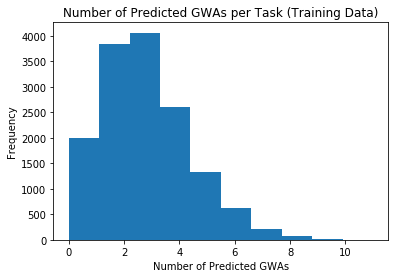

In [27]:
hot1_train_predictions = pd.DataFrame(train_preds, index = train.index)
train_freqs = hot1_train_predictions.apply(lambda x: sum(x), axis = 1)

plt.hist(train_freqs)
plt.xlabel('Number of Predicted GWAs')
plt.ylabel('Frequency')
plt.title('Number of Predicted GWAs per Task (Training Data)')
plt.show()

This chart tells us that or model tends to predict 3-4 GWA for tasks, but it will predict as many as 10 in our training data. Earlier we found that the tasks in the actual O\*NET data typically only have one GWA assigned to them. 

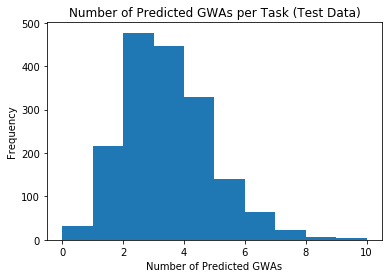

In [30]:
hot1_val_predictions = pd.DataFrame(val_preds, index = validation.index)
val_freqs = hot1_val_predictions.apply(lambda x: sum(x), axis = 1)

plt.hist(val_freqs)
plt.xlabel('Number of Predicted GWAs')
plt.ylabel('Frequency')
plt.title('Number of Predicted GWAs per Task (Test Data)')
plt.show()

We see a similar result in our test data. 

---

Now lets compile our results in an "easy-to-read" dataframe to get an idea of how our model performed.

In [34]:
ez_train = ez_df.loc[train.index]
ez_train_preds = hu.onehot_to_ez(hot1_train_predictions, is_prediction = True)
ez_train_results = pd.concat([ez_train, ez_train_preds], axis = 1)
ez_train_results

GWA 1  \
Assemble and arrange display materials.                                   Handling and Moving Objects   
Mark identification numbers, trademarks, grades...           Identifying Objects, Actions, and Events   
Shape shoe heels with a knife, and sand them on...                        Handling and Moving Objects   
Read scripts and consult directors and other pr...                                Getting Information   
Analyze characteristics of animals to identify ...                                Getting Information   
Estimate the amounts, types, or costs of needed...              Making Decisions and Solving Problems   
Prepare classrooms with a variety of materials ...                        Handling and Moving Objects   
Remove extra compound after surfaces have been ...             Performing General Physical Activities   
Estimate freight or postal rates and record shi...              Making Decisions and Solving Problems   
Repair and replace damaged or worn parts.              Repairing and Maintaining Mechanical Equipment   
Check floors of plants to ensure that they are ...      Inspecting Equipment, Structures, or Material   
Study blueprints, drawings, and sketches to det...                                Getting Information   
Inspect and test operation, mechanical parts, a...      Inspecting Equipment, Structures, or Material   
Review clinical or other medical research proto...              Making Decisions and Solving Problems   
Take photographs of displays or signage.                           Controlling Machines and Processes   
Develop and maintain liaisons with municipaliti...  Establishing and Maintaining Interpersonal Rel...   
Turn valves to circulate water through cores, o...                        Handling and Moving Objects   
Read blueprints and select appropriate insulati...                                Getting Information   
Evaluate the effectiveness of counseling progra...      Monitor Processes, Materials, or Surroundings   
Evaluate robotic systems or prototypes.             Judging the Qualities of Things, Services, or ...   
Prepare treatment rooms for patient examination...             Performing General Physical Activities   
Confer with managers to determine times and pla...  Communicating with Supervisors, Peers, or Subo...   
Operate equipment, such as a centrifuge, to ext...                 Controlling Machines and Processes   
Provide assistance to patrons entering or exiti...                    Assisting and Caring for Others   
Maintain accurate laboratory records and data.                      Documenting/Recording Information   
Communicate with staff or clients to understand...  Communicating with Supervisors, Peers, or Subo...   
Assist host or hostess by answering phones to t...                     Scheduling Work and Activities   
Compute cost estimates for labor and materials.     Estimating the Quantifiable Characteristics of...   
Spread roofing paper on surface of foundation a...             Performing General Physical Activities   
Provide advice and technical assistance with co...          Provide Consultation and Advice to Others   
...                                                                                               ...   
Ensure that money collected is properly recorde...                             Processing Information   
Feed or exercise animals or provide other gener...             Performing General Physical Activities   
Identify the ownership of each piece of taxable...  Evaluating Information to Determine Compliance...   
Open, sort, and distribute incoming corresponde...                             Processing Information   
Purchase investments for companies in accordanc...               Monitoring and Controlling Resources   
Oversee the flow of cash or financial instruments.      Monitor Processes, Materials, or Surroundings   
Analyze, estimate, or report production costs.      Estimating the Quantifiable Characteristics of...   
D

Just from scrolling through the table, it looks like the model is able to predict the O\*NET assigned GWA labels quite often, but it also includes many other labels.

---

Let's do the same for the validation data.

In [38]:
# Create easy-to-read test data results dataframe
ez_val = ez_df.loc[validation.index]
ez_val_preds = hu.onehot_to_ez(hot1_val_predictions, is_prediction = True)
ez_val_results = pd.concat([ez_val, ez_val_preds], axis = 1)
ez_val_results

GWA 1  \
Load materials and products into package proces...             Performing General Physical Activities   
Obtain a customer's previous record, or verify ...                                Getting Information   
Sell goods such as contact lenses, spectacles, ...                      Selling or Influencing Others   
Scrape decayed matter from cavities in trees an...                        Handling and Moving Objects   
Collaborate with other researchers in the plann...  Communicating with Supervisors, Peers, or Subo...   
Interact with the public to answer traffic-rela...    Communicating with Persons Outside Organization   
Direct the operation and organization of kitche...    Guiding, Directing, and Motivating Subordinates   
Reassemble equipment after completion of inspec...                        Handling and Moving Objects   
Sew buttonholes, or add lace or other trimming.                           Handling and Moving Objects   
Relay or route written or verbal messages.          Communicating with Supervisors, Peers, or Subo...   
Plan movement of products through lines to proc...        Organizing, Planning, and Prioritizing Work   
Review loan agreements to ensure that they are ...                             Processing Information   
Develop planting plans to help clients garden p...        Organizing, Planning, and Prioritizing Work   
Fabricate and install parts and systems to be t...                        Handling and Moving Objects   
Observe patients during treatment to compile an...      Monitor Processes, Materials, or Surroundings   
Compile information, such as production rates a...                             Processing Information   
Cut slots along working faces of coal, salt, or...                 Controlling Machines and Processes   
Manage warranty repair or replacement services.       Guiding, Directing, and Motivating Subordinates   
Consult with end users regarding problems in ac...          Provide Consultation and Advice to Others   
Supervise activities such as searches, shakedow...    Guiding, Directing, and Motivating Subordinates   
Manage private livestock operations.                  Guiding, Directing, and Motivating Subordinates   
Seal open sides of modular units to prepare the...                        Handling and Moving Objects   
Write interesting and effective press releases,...    Communicating with Persons Outside Organization   
Promote awareness or use of alternative or rene...                      Selling or Influencing Others   
Start pumps to operate distilling systems that ...             Performing General Physical Activities   
Observe loading of freight to ensure that crews...      Monitor Processes, Materials, or Surroundings   
Schedule or manage staff, such as volunteer ush...    Guiding, Directing, and Motivating Subordinates   
Improve fuel efficiency by testing vehicles or ...      Inspecting Equipment, Structures, or Material   
Smooth surfaces, using sandpaper, scrapers, bru...                        Handling and Moving Objects   
Repair or replace broken or malfunctioning comp...     Repairing and Maintaining Mechanical Equipment   
...                                                                                               ...   
Participate in search-and-rescue operations.                          Assisting and Caring for Others   
Operate, control, or monitor integrated gasific...                 Controlling Machines and Processes   
Perform final touch-ups with sandpaper or steel...                        Handling and Moving Objects   
Pack containers and re-pack damaged containers.                           Handling and Moving Objects   
Check books in and out of the library.                           Performing Administrative Activities   
Interview persons present at death scenes to ob...                                Getting Information   
Develop story lines for broadcasts.                                               Thinking Creatively   
T

We see a similar pattern in our validation data.

### Calculating Precision, Recall, and F1

In [40]:
from sklearn.metrics import precision_recall_fscore_support

In [41]:
#training data model evaluation
precision_recall_fscore_support(train, hot1_train_predictions, average='micro')

(0.3331253203770978, 0.8677503628447024, 0.4814313782330016, None)

In [42]:
#test data model evaluation
precision_recall_fscore_support(validation, hot1_val_predictions, average='micro')

(0.29854791868344627, 0.7717717717717718, 0.4305458606729024, None)

From these evaluation metrics, we see that both our train and validation data have low precision scores and relatively high recall scores. So the model tends to predict false positives. However as we mentioned earlier, due to the nature of the O\*NET data we cannot necessarily the model is doing poorly since the O\*NET labels are not as descriptive as they could be.

---

Next we'll use a technique called grid search to tune hyperparameters for our logistic regression model, test on our validation set again, then predict on our test set. 

### Using Grid Search to Tune Hyperparameters

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import precision_recall_fscore_support

In [ ]:
# Example using "Handling and Moving Objects" and target class
# Sampling to create an even dataset
hamo_sample = onehot_df[onehot_df['Handling and Moving Objects'] == 1].sample(2000)
nonhamo_df = onehot_df[onehot_df['Handling and Moving Objects'] != 1].sample(3000)
equal_hamo_data = (pd.concat([hamo_sample, nonhamo_df]))
train, test = train_test_split(equal_hamo_data, test_size = 0.15, shuffle = True)

gscv = Pipeline([('preproc', TfidfVectorizer(analyzer = hu.stemmed_words)), 
                  ('param tune', GridSearchCV(LogisticRegression(),
                               param_grid={'penalty': ['l1', 'l2'],
                                           'C':[0.001,.009,0.01,.09,1,5,10,25, 50, 100, 500, 1000, 5000, 10000, 100000]},
                               cv=3,
                               scoring = 'recall',
                               refit=True))])

gscv.fit(train.index, train['Handling and Moving Objects'])
test_predicted = gscv.predict(test.index)

p, r, f1, s = precision_recall_fscore_support(test['Handling and Moving Objects'], test_predicted, labels = [1, 0])



In [49]:
# New Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(test['Handling and Moving Objects'],test_predicted)))
print('Error: ', 1 - accuracy_score(test['Handling and Moving Objects'],test_predicted))
print('Recall Score : ' , r)
print('Precision Score : ' , p)
print('F1 Score : ' , f1)

gscv.named_steps['param tune'].best_estimator_

Accuracy Score : 0.868
Error:  0.132
Recall Score :  [0.80666667 0.90888889]
Precision Score :  [0.85512367 0.875803  ]
F1 Score :  [0.83018868 0.89203926]


LogisticRegression(C=5000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [ ]:
#'Performing for or Working Directly with the Public'
# Accuracy Score : 0.9873563218390805
# Recall Score : 0.7272727272727273
# Precision Score : 0.2962962962962963
# F1 Score : 0.42105263157894735
# LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
#           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
#           penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
#           verbose=0, warm_start=False)

In [32]:
#Handling and Moving objects

# NO SAMPLING
# Accuracy Score : 0.9097701149425287
# Precision Score : 0.668769716088328
# Recall Score : 0.803030303030303
# F1 Score : 0.7297762478485369
# LogisticRegression(C=500, class_weight=None, dual=False, fit_intercept=True,
#           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
#           penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
#           verbose=0, warm_start=False)

# Accuracy Score : 0.9137931034482759
# Recall Score : 0.7689393939393939
# Precision Score : 0.6952054794520548
# F1 Score : 0.7302158273381295
# LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
#           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
#           penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
#           verbose=0, warm_start=False)

# SAMPLING 

# Accuracy Score : 0.868
# Error:  0.132
# Recall Score :  [0.80666667 0.90888889]
# Precision Score :  [0.85512367 0.875803  ]
# F1 Score :  [0.83018868 0.89203926]
# LogisticRegression(C=5000, class_weight=None, dual=False, fit_intercept=True,
#           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
#           penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
#           verbose=0, warm_start=False)

LogisticRegression(C=25, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Only keeping labels above probability threshold

We see that our model tends to predict many labels for each task, this is not necessary "bad" because the original O\*NET GWA labels are not as descriptive of the entire task as they could be. So having a model that assigns multiple labels consistantly could actually give us a more descriptive idea of the GWAs that describe that task. However, we do see that for some tasks the model assigns as many as 10 labels. This is probably too many, so we'll try two different techniques to limit the model's predictions.

#### Method 1: Only predicting labels whose associated probabilites are over a certain threshold

In [159]:
# Only predict labels whose associated probabilities are over threshold
pred_prob = {}
for count, gwa in enumerate(df.GWA.unique()):
    model = train_classifier(gwa, train)
    probs = [1 if x[1] > 0.525 else 0 for x in model.predict_proba(train.index)]
    pred_prob[gwa] = probs

In [160]:
prob_train_pred = pd.DataFrame(pred_prob, index = train.index)
prob_train_pred

Analyzing Data or Information  \
Inspect and maintain vehicle supplies and equip...                              0   
Provide applicants with assistance in completin...                              0   
Design new or improved transport infrastructure...                              0   
Pack containers and re-pack damaged containers.                                 0   
Practice demonstrations to ensure that they wil...                              0   
Oversee gameplay testing to ensure intended gam...                              0   
Perform undercover assignments and maintain sur...                              0   
Collect geospatial data, using technologies suc...                              1   
Complete quality control activities, monitor eq...                              0   
Test conductors, according to electrical diagra...                              0   
Manage schedules and set dates, times, and loca...                              0   
Confer with clients regarding price and type of...                              0   
Prepare and submit detailed and summary reports...                              0   
Advise clients on market conditions, prices, mo...                              0   
Comment on music and other matters, such as wea...                              0   
Use informatics science to design or implement ...                              0   
Prepare and assemble materials.                                                 0   
Prepare solar installation project proposals, q...                              0   
Operate counters and record data to assess the ...                              1   
Repair leaks in valve seats or bellows of autom...                              0   
Set and maintain a bank and table limit for eac...                              0   
Prescribe hormonal agents or topical treatments...                              0   
Take action to contain hazardous chemicals that...                              0   
Organize and maintain geospatial data and assoc...                              0   
Update manuals when rates, rules, or regulation...                              0   
Activate valves to maintain required amounts of...                              0   
Contribute expertise to develop medical mainten...                              0   
Interpret or evaluate test results in accordanc...                              1   
Obtain, compile and record patient medical data...                              1   
Perform clerical duties such as typing, proofre...                              0   
...                                                                           ...   
Prepare or edit organizational publications, su...                              0   
Manage quantity food service departments or cli...                              0   
Attend meetings, trade shows, conferences, conv...                              0   
Determine cargo transportation capabilities by ...                              1   
Develop active control algorithms, electronics,...                              0   
Soften leather or shoe material with water to p...                              0   
Set reduction scales to attain specified sizes ...                              0   
Advertise products and work, using media such a...                              0   
Process and code film from procedures and compl...                              0   
Select coolants and lubricants, and start their...                              0   
Advise on health risks in the workplace or on h...                              0   
Conduct applied research on the effects of indu...                              0   
Direct or coordinate activities of engineering ...                              0   
Measure and take impressions of patients' jaws ...                              0   
Perform minor maintenance on emergency medical ...                              0   
Arrange conference, meeting, or travel reservat...       

In [161]:
#training data model evaluation
precision_recall_fscore_support(train, prob_train_pred, average='micro')

(0.37774728830671256, 0.8015380390002746, 0.5134954428687053, None)

In [60]:
#test data 
test_pred_prob = {}
for count, gwa in enumerate(df.GWA.unique()):
    model = train_classifier(gwa, train)
    probs = [1 if x[1] > 0.525 else 0 for x in model.predict_proba(test.index)]
    test_pred_prob[gwa] = probs

In [62]:
prob_test_pred = pd.DataFrame(test_pred_prob, index = test.index)
prob_test_pred

Analyzing Data or Information  \
Document equipment or process details of radio ...                              0   
Verify, collect, or punch tickets before admitt...                              0   
Confer with process engineers, plant operators,...                              0   
Transfer animals between enclosures to facilita...                              0   
Move or position materials such as marble slabs...                              0   
Guard facility entrances to screen visitors.                                    0   
Sell supplies, such as seed, feed, fertilizers,...                              0   
Initiate sales campaigns to meet sales and prod...                              0   
Interpret engineering drawings, sketches, or di...                              1   
Compile and balance cash receipts at the end of...                              0   
Mix ingredients according to specified procedur...                              0   
Start motors and engage machinery, such as spra...                              0   
Repair or adjust seats, doors, or windows.                                      0   
Collect body tissue, feces, blood, urine, or ot...                              1   
Remove and replace dull cutting tools.                                          0   
Direct the purchase, modification, installation...                              0   
Operate controls to move or discharge metal wor...                              0   
Measure and mark guidelines on surfaces or foun...                              0   
Assemble, install, test, or maintain electrical...                              0   
Preheat workpieces prior to welding or bending,...                              0   
Attend care plan meetings to review patient pro...                              0   
Supervise the work of logistics specialists, pl...                              0   
Negotiate terms and conditions of reinsurance w...                              0   
Devise and choreograph dance for self or others.                                0   
Evaluate premises for cleanliness, such as prop...                              1   
Shape old parts and replacement parts to improv...                              0   
Locate and appraise undeveloped areas for build...                              1   
Assemble meal trays with foods in accordance wi...                              0   
Operate radio equipment to communicate with shi...                              0   
Load computer tapes and disks, and install soft...                              0   
...                                                                           ...   
Use data entry devices, such as optical scanner...                              1   
Clean boats and repair hulls and superstructure...                              0   
Collaborate with interdisciplinary team members...                              0   
Produce data layers, maps, tables, or reports, ...                              1   
Decide where to set traps, using grid maps and ...                              0   
Provide on-the-job training to new air traffic ...                              0   
Measure or weigh materials, using rulers, calcu...                              0   
Participate in the development or testing of ne...                              1   
Draw cutting lines on material following patter...                              0   
Connect regulators to test stands, and turn scr...                              0   
Check dimensions of materials to be used and as...                              0   
Select appropriate equipment settings and adjus...                              0   
Provide consultation to parents, teachers, admi...                              0   
Resolve questions or problems with customs offi...                              0   
Oil winch drums so that cables will wind smoothly.                              0   
Participate in continuing education activities ...       

In [63]:
precision_recall_fscore_support(test, prob_test_pred, average='micro')

(0.3404059040590406, 0.7346938775510204, 0.46524822695035467, None)

 I don't think this is the way to go. Even when we choose a threshold that is only slight above 0.5, it lowers recall too significantly, although it does increase precision. But in our case I think we'd prefer to have a higher recall than precision (False negatives are less desirable than false positives in our situation). 

#### Method 2: Only keeping top 3 predicted labels with highest probabilities

In [40]:
# Only keeps top 3 predict labels with highest associated probabilities 
pred_prob3 = {}
for count, gwa in enumerate(df.GWA.unique()):
    model = train_classifier(gwa, train)
    probs3 = [p[1] for p in model.predict_proba(train.index)]
    pred_prob3[gwa] = probs3
    #pred_prob3[gwa] = [1 if p >= 0.5 else 0 for p in probs3]

In [41]:
prob_train_pred3 = pd.DataFrame(pred_prob3, index = train.index)
prob_train_pred3

Analyzing Data or Information  \
Obtain and use search and arrest warrants.                               0.435186   
Set educational standards and goals, and help e...                       0.394332   
Participate in creating fire safety guidelines ...                       0.362431   
Mark and drill holes in jewelry mountings in or...                       0.349170   
Set doors into place or stack hardware sections...                       0.325442   
Compute cost of travel and accommodations, usin...                       0.602085   
Perform covert surveillance of areas susceptibl...                       0.426414   
Operate diagnostic equipment, such as radiograp...                       0.572620   
Tend machines that pump concrete, grout, cement...                       0.294661   
Tutor and assist children individually or in sm...                       0.282232   
Connect car frames to counterweights, using ste...                       0.316717   
Schedule maintenance and use of facilities.                              0.357305   
Apply precision agriculture information to spec...                       0.533275   
Develop anesthesia care plans.                                           0.449535   
Track and analyze factors that affect price mov...                       0.639362   
Clean chipped area, using wire brush, and feel ...                       0.354086   
Compute and analyze data, using statistical for...                       0.738584   
Distribute brochures, show audiovisual presenta...                       0.352494   
Provide presentation and product demonstration ...                       0.302846   
Repair, rework, or calibrate hydraulic or pneum...                       0.352983   
Prescribe medications and observe patients' rea...                       0.351886   
Recommend procedures or equipment or software u...                       0.492404   
Develop or implement plans for revegetation of ...                       0.448262   
Install, maintain, and repair animal care facil...                       0.239375   
Read work orders to determine production specif...                       0.356070   
Provide training and support to system designer...                       0.274009   
Observe continuous operation of automatic machi...                       0.253444   
Review computer-processed digital images for qu...                       0.581622   
Negotiate or approve contracts or agreements wi...                       0.386716   
Examine cells stained with dye to locate abnorm...                       0.580236   
...                                                                           ...   
Maintain and develop positive business relation...                       0.376363   
Train staff in the use or sale of products, pro...                       0.309474   
Work as part of a healthcare team to assess pat...                       0.416787   
Operate equipment, such as a centrifuge, to ext...                       0.331189   
Coordinate on-site activities for environmental...                       0.409238   
Develop protocols to improve existing genetic t...                       0.568578   
Lubricate workpieces with oil.                                           0.351436   
Perform medical procedures, such as administeri...                       0.408867   
Check to ensure that all players have placed be...                       0.329359   
Examine patient, obtain medical history, and us...                       0.660995   
Take and record measures of patients' physical ...                       0.428500   
Transport metal ingots to storage areas, using ...                       0.359656   
Compose and edit scripts or provide screenwrite...                       0.307704   
Activate shears and grinders to trim workpieces.                         0.314328   
Test and adjust repaired systems to meet manufa...                       0.412729   
Establish specifications for reproductions and ...       

In [59]:
train_top3_dict = {}
for i, row in prob_train_pred3.iterrows():
    predictions = []
    print(row[row > 0.5].sort_values(ascending = False).iloc[0:3])
    pos_pred = list(row[row > 0.5].sort_values(ascending = False).iloc[0:3].index)
    for col in prob_train_pred3.columns:
        if col in pos_pred:
            predictions.append(1)
        else:
            predictions.append(0)
    train_top3_dict[row.name] = predictions

Getting Information    0.607461
Name: Obtain and use search and arrest warrants., dtype: float64
Developing Objectives and Strategies                  0.660760
Thinking Creatively                                   0.555251
Interpreting the Meaning of Information for Others    0.531441
Name: Set educational standards and goals, and help establish policies and procedures to carry them out., dtype: float64
Organizing, Planning, and Prioritizing Work    0.503924
Name: Participate in creating fire safety guidelines and evacuation schemes for nonresidential buildings., dtype: float64
Handling and Moving Objects              0.610211
Making Decisions and Solving Problems    0.526850
Name: Mark and drill holes in jewelry mountings in order to center stones according to design specifications., dtype: float64
Handling and Moving Objects           0.708307
Controlling Machines and Processes    0.589405
Name: Set doors into place or stack hardware sections into openings after rail or track install

Name: Move terrazzo installation materials, tools, machines, or work devices to work areas, manually or using wheelbarrow., dtype: float64
Getting Information                                       0.610112
Communicating with Persons Outside Organization           0.555182
Communicating with Supervisors, Peers, or Subordinates    0.507083
Name: Contact individuals to be interviewed at home, place of business, or field location, by telephone, mail, or in person., dtype: float64
Estimating the Quantifiable Characteristics of Products, Events, or Information    0.749195
Inspecting Equipment, Structures, or Material                                      0.561930
Performing General Physical Activities                                             0.546853
Name: Measure or weigh ingredients, using scales or measuring containers., dtype: float64
Interpreting the Meaning of Information for Others    0.666431
Assisting and Caring for Others                       0.580942
Analyzing Data or Informati

Name: Supervise staff, volunteers, practicum students, or interns engaged in music therapy activities., dtype: float64
Monitor Processes, Materials, or Surroundings    0.672195
Inspecting Equipment, Structures, or Material    0.615945
Handling and Moving Objects                      0.554495
Name: Fill pipes or plumbing fixtures with water or air and observe pressure gauges to detect and locate leaks., dtype: float64
Thinking Creatively                     0.633494
Analyzing Data or Information           0.613095
Developing Objectives and Strategies    0.544688
Name: Develop methodologies to assess the viability or success of sustainability initiatives., dtype: float64
Communicating with Supervisors, Peers, or Subordinates    0.613293
Getting Information                                       0.539789
Organizing, Planning, and Prioritizing Work               0.524765
Name: Check military flight plans with civilian agencies., dtype: float64
Assisting and Caring for Others    0.56391
Name

Name: Arrange to pick up particular customers or groups on a regular schedule., dtype: float64
Thinking Creatively                     0.785645
Interacting With Computers              0.675812
Developing Objectives and Strategies    0.536169
Name: Direct the analysis, development, and operation of complete computer systems., dtype: float64
Communicating with Persons Outside Organization       0.660312
Interpreting the Meaning of Information for Others    0.629435
Selling or Influencing Others                         0.560833
Name: Prepare and deliver technical presentations that explain products or services to customers and prospective customers., dtype: float64
Getting Information                              0.532643
Inspecting Equipment, Structures, or Material    0.506403
Name: Experiment with different types of dancers, steps, dances, and placements, testing ideas informally to get feedback from dancers., dtype: float64
Communicating with Supervisors, Peers, or Subordinates    0.6

Name: Provide assistance to other local law enforcement agencies as required., dtype: float64
Performing General Physical Activities            0.707372
Repairing and Maintaining Mechanical Equipment    0.507460
Monitoring and Controlling Resources              0.504494
Name: Clean and sterilize instruments and dispose of contaminated supplies., dtype: float64
Provide Consultation and Advice to Others             0.723852
Organizing, Planning, and Prioritizing Work           0.543060
Interpreting the Meaning of Information for Others    0.523190
Name: Recommend educational materials or resources to clients on matters such as financial planning, budgeting, or credit., dtype: float64
Assisting and Caring for Others                       0.610566
Interpreting the Meaning of Information for Others    0.523867
Performing for or Working Directly with the Public    0.514894
Name: Escort customers to their tables., dtype: float64
Documenting/Recording Information       0.622523
Thinking Creati

Name: Prepare appropriate formatting to data sets as requested., dtype: float64
Getting Information                      0.676255
Analyzing Data or Information            0.616873
Making Decisions and Solving Problems    0.514487
Name: Research environmental effects of present and potential uses of land and water areas, determining methods of improving environmental conditions or such outputs as crop yields., dtype: float64
Thinking Creatively             0.637561
Getting Information             0.623737
Training and Teaching Others    0.596187
Name: Instruct individuals in career development techniques, such as job search and application strategies, resume writing, and interview skills., dtype: float64
Interpreting the Meaning of Information for Others    0.593159
Provide Consultation and Advice to Others             0.540529
Monitor Processes, Materials, or Surroundings         0.538538
Name: Interpret and enforce government acts and regulations and explain required standards to agri

Name: Maintain service records of robotic equipment or automated production systems., dtype: float64
Making Decisions and Solving Problems          0.792997
Thinking Creatively                            0.600128
Organizing, Planning, and Prioritizing Work    0.507715
Name: Plan arrangement according to client's requirements, utilizing knowledge of design and properties of materials, or select appropriate standard design pattern., dtype: float64
Organizing, Planning, and Prioritizing Work    0.58288
Name: Plan sequences of operations, applying knowledge of physical properties of workpiece materials., dtype: float64
Handling and Moving Objects           0.616374
Controlling Machines and Processes    0.579308
Name: Place explosive charges in holes or other spots; then detonate explosives to demolish structures or to loosen, remove, or displace earth, rock, or other materials., dtype: float64
Training and Teaching Others    0.642161
Name: Teach classes using online technology., dtype: flo

Name: Load smaller aircraft, handling passenger luggage and supervising refueling., dtype: float64
Controlling Machines and Processes       0.620527
Making Decisions and Solving Problems    0.555620
Name: Drive machines into piles of material blasted from working faces., dtype: float64
Thinking Creatively                            0.713814
Organizing, Planning, and Prioritizing Work    0.536795
Developing Objectives and Strategies           0.522347
Name: Immerse film, negatives, paper, or prints in developing solutions, fixing solutions, and water to complete photographic development processes., dtype: float64
Guiding, Directing, and Motivating Subordinates    0.581341
Organizing, Planning, and Prioritizing Work        0.525657
Provide Consultation and Advice to Others          0.521039
Name: Manage special events, such as sponsorship of races, parties introducing new products, or other activities the firm supports, to gain public attention through the media without advertising direc

Name: Operate electric kilns that heat and mold glass sheets to the shape and curve of metal jigs., dtype: float64
Making Decisions and Solving Problems    0.604940
Analyzing Data or Information            0.578210
Getting Information                      0.542884
Name: Determine patterns of building use to show annual or monthly needs for heating, cooling, lighting, or other energy needs., dtype: float64
Interpreting the Meaning of Information for Others        0.645073
Communicating with Supervisors, Peers, or Subordinates    0.626208
Communicating with Persons Outside Organization           0.613748
Name: Provide information to customers on the care of trees, shrubs, flowers, plants, and lawns., dtype: float64
Inspecting Equipment, Structures, or Material    0.761505
Developing Objectives and Strategies             0.520705
Monitor Processes, Materials, or Surroundings    0.512020
Name: Update automated test scripts to ensure currency., dtype: float64
Documenting/Recording Informati

Name: Perform or arrange for repairs, such as complete overhauls, replacement of defective valves, gaskets, or bearings, or fabrication of new parts., dtype: float64
Training and Teaching Others                              0.649918
Staffing Organizational Units                             0.589919
Communicating with Supervisors, Peers, or Subordinates    0.568338
Name: Develop staff service or retail goals and guide staff in goal achievement., dtype: float64
Handling and Moving Objects                    0.511103
Organizing, Planning, and Prioritizing Work    0.506003
Name: Create finished art work as decoration, or to elucidate or substitute for spoken or written messages., dtype: float64
Repairing and Maintaining Mechanical Equipment    0.720719
Inspecting Equipment, Structures, or Material     0.717522
Name: Inspect new, repaired, or modified aircraft to identify damage or defects and to assess airworthiness and conformance to standards, using checklists, hand tools, and test instr

Name: Repair concrete by cutting out damaged areas, drilling holes for reinforcing rods, and positioning reinforcing rods, using power saw and drill., dtype: float64
Making Decisions and Solving Problems                                              0.540248
Estimating the Quantifiable Characteristics of Products, Events, or Information    0.533214
Analyzing Data or Information                                                      0.506945
Name: Prepare invoices or cost quotations for freight transportation., dtype: float64
Documenting/Recording Information    0.732474
Analyzing Data or Information        0.572184
Name: Analyze monthly department budgeting and accounting reports to maintain expenditure controls., dtype: float64
Thinking Creatively           0.600879
Interacting With Computers    0.512153
Name: Operate computer-aided drafting (CAD) equipment or conventional drafting station to produce designs, working drawings, charts, forms, and records., dtype: float64
Documenting/Recor

Name: Use ventilators or various oxygen devices or aerosol and breathing treatments in the provision of respiratory therapy., dtype: float64
Interacting With Computers    0.571074
Name: Enter data, such as coordinates of images and color specifications, into system to retouch and make color corrections., dtype: float64
Performing General Physical Activities         0.558941
Assisting and Caring for Others                0.502547
Organizing, Planning, and Prioritizing Work    0.500039
Name: Initiate or participate in emergency response procedures to contain, secure, or clean spills of hazardous materials., dtype: float64
Handling and Moving Objects    0.653146
Name: Construct wooden models, patterns, templates, full scale mock-ups, and molds for parts of products and production tools., dtype: float64
Communicating with Supervisors, Peers, or Subordinates    0.516628
Provide Consultation and Advice to Others                 0.512222
Name: Listen for jackpot alarm bells and issue payoffs 

Name: Drive trucks to haul tools and equipment for on-site repair of large machinery., dtype: float64
Documenting/Recording Information                         0.899917
Communicating with Supervisors, Peers, or Subordinates    0.515069
Name: Keep records of work orders and test and maintenance reports., dtype: float64
Repairing and Maintaining Mechanical Equipment    0.521521
Monitor Processes, Materials, or Surroundings     0.500655
Name: Trace and tag meters or house lines., dtype: float64
Communicating with Supervisors, Peers, or Subordinates    0.652136
Documenting/Recording Information                         0.629251
Name: Prepare and submit case reports or summaries to government or mental health agencies., dtype: float64
Organizing, Planning, and Prioritizing Work               0.547971
Monitoring and Controlling Resources                      0.545149
Communicating with Supervisors, Peers, or Subordinates    0.539765
Name: Review invoices, work orders, consumption reports, or 

Name: Complete baggage insurance forms., dtype: float64
Series([], Name: Compare the house hand with players' hands to determine the winner., dtype: float64)
Communicating with Persons Outside Organization    0.570474
Name: Answer passengers' questions about flights, aircraft, weather, travel routes and services, arrival times, or schedules., dtype: float64
Getting Information                      0.672478
Updating and Using Relevant Knowledge    0.563689
Documenting/Recording Information        0.538931
Name: Present research findings at national meetings or in peer-reviewed journals., dtype: float64
Communicating with Supervisors, Peers, or Subordinates    0.682005
Getting Information                                       0.617391
Performing for or Working Directly with the Public        0.521240
Name: Communicate with customers regarding orders, comments, and complaints., dtype: float64
Controlling Machines and Processes                0.794960
Repairing and Maintaining Mechanical E

Name: Collaborate with other colleagues, such as copyists, to complete final scores., dtype: float64
Handling and Moving Objects               0.793924
Controlling Machines and Processes        0.674887
Performing General Physical Activities    0.568181
Name: Dig holes, using augers, and set poles, using cranes and power equipment., dtype: float64
Documenting/Recording Information    0.698864
Name: Prepare documentation or presentations, including charts, photos, or graphs., dtype: float64
Communicating with Supervisors, Peers, or Subordinates    0.617296
Making Decisions and Solving Problems                     0.532270
Provide Consultation and Advice to Others                 0.514213
Name: Resolve problems concerning the overall financial integrity of banking institutions including loan investment portfolios, capital, earnings, and specific or large troubled accounts., dtype: float64
Inspecting Equipment, Structures, or Material    0.644468
Monitor Processes, Materials, or Surroundi

Name: Stay abreast of new types of loans and other financial services and products to better meet customers' needs., dtype: float64
Inspecting Equipment, Structures, or Material    0.77943
Monitor Processes, Materials, or Surroundings    0.63947
Name: Monitor building security and safety by performing tasks such as locking doors after operating hours or checking electrical appliance use to ensure that hazards are not created., dtype: float64
Guiding, Directing, and Motivating Subordinates           0.711450
Communicating with Supervisors, Peers, or Subordinates    0.610355
Organizing, Planning, and Prioritizing Work               0.536387
Name: Supervise and assign work to programmers, designers, technologists, technicians, or other engineering or scientific personnel., dtype: float64
Guiding, Directing, and Motivating Subordinates    0.792877
Training and Teaching Others                       0.599567
Name: Arrange for in-house and external training activities., dtype: float64
Communi

Name: Position and clamp stock on tables, conveyors, or carriages, using hoists, guides, stops, dogs, wedges, or wrenches., dtype: float64
Series([], Name: Initiate and direct efforts to foster tolerance, understanding, and appreciation of diversity in school communities., dtype: float64)
Monitoring and Controlling Resources    0.858566
Name: Place orders, such as for equipment, supplies, or catering for meetings., dtype: float64
Provide Consultation and Advice to Others    0.501075
Name: Negotiate with retail merchants to improve product exposure, such as shelf positioning and advertising., dtype: float64
Provide Consultation and Advice to Others                 0.736512
Assisting and Caring for Others                           0.651419
Communicating with Supervisors, Peers, or Subordinates    0.598268
Name: Provide technical assistance to surgeons, surgical nurses, or anesthesiologists., dtype: float64
Controlling Machines and Processes    0.642532
Name: Operate levers to move convey

Name: Requisition supplies., dtype: float64
Communicating with Supervisors, Peers, or Subordinates    0.665472
Provide Consultation and Advice to Others                 0.521236
Interpreting the Meaning of Information for Others        0.521119
Name: Provide verbal or written project status reports to project teams, management, subcontractors, customers, or owners., dtype: float64
Making Decisions and Solving Problems          0.645370
Organizing, Planning, and Prioritizing Work    0.527226
Analyzing Data or Information                  0.502898
Name: Determine response requirements and relative priorities of situations, and dispatch units in accordance with established procedures., dtype: float64
Thinking Creatively                      0.795778
Making Decisions and Solving Problems    0.618908
Developing Objectives and Strategies     0.546196
Name: Design or implement plant warehousing strategies for production materials or finished products., dtype: float64
Repairing and Maintaining

Name: Review work orders, blueprints, specifications, or job samples to determine components, settings, and adjustments for cutting and slicing machines., dtype: float64
Monitor Processes, Materials, or Surroundings    0.680047
Controlling Machines and Processes               0.580774
Inspecting Equipment, Structures, or Material    0.537197
Name: Monitor radio range stations to detect transmission flaws and adjust controls to eliminate flaws., dtype: float64
Updating and Using Relevant Knowledge          0.753211
Organizing, Planning, and Prioritizing Work    0.531389
Analyzing Data or Information                  0.518400
Name: Keep abreast of game design technology and techniques, industry trends, or audience interests, reactions, and needs by reviewing current literature, talking with colleagues, participating in educational programs, attending meetings or workshops, or participating in professional organizations or conferences., dtype: float64
Updating and Using Relevant Knowledge

Updating and Using Relevant Knowledge                       0.597067
Organizing, Planning, and Prioritizing Work                 0.530864
Establishing and Maintaining Interpersonal Relationships    0.524935
Name: Attend workshops, seminars, or professional meetings to remain informed of new developments in school psychology., dtype: float64
Handling and Moving Objects    0.622759
Name: Fill small dents or scratches with body fillers and smooth surfaces to prepare vehicles for painting., dtype: float64
Estimating the Quantifiable Characteristics of Products, Events, or Information    0.666368
Making Decisions and Solving Problems                                              0.639130
Repairing and Maintaining Mechanical Equipment                                     0.605240
Name: Estimate costs of vehicle repair., dtype: float64
Documenting/Recording Information    0.649685
Name: Inspect account books and accounting systems for efficiency, effectiveness, and use of accepted accounting pr

Name: Notify supervisor or computer maintenance technicians of equipment malfunctions., dtype: float64
Training and Teaching Others                       0.665505
Staffing Organizational Units                      0.613862
Guiding, Directing, and Motivating Subordinates    0.567532
Name: Employ foremen to deal directly with workers when recruiting, hiring, instructing, assigning tasks, and enforcing work rules., dtype: float64
Documenting/Recording Information                                0.660889
Evaluating Information to Determine Compliance with Standards    0.541318
Monitor Processes, Materials, or Surroundings                    0.503963
Name: Prepare environmental permit applications or compliance reports., dtype: float64
Inspecting Equipment, Structures, or Material    0.510204
Name: Return borrowed or rented items when productions are complete and return other items to storage., dtype: float64
Communicating with Supervisors, Peers, or Subordinates    0.804414
Provide Consulta

Name: Advise surgeon of a patient's risk status and recommend appropriate intervention to minimize risk., dtype: float64
Monitor Processes, Materials, or Surroundings             0.578276
Communicating with Supervisors, Peers, or Subordinates    0.569862
Assisting and Caring for Others                           0.558246
Name: Decontaminate ambulance interior following treatment of patient with infectious disease and report case to proper authorities., dtype: float64
Documenting/Recording Information                  0.575866
Analyzing Data or Information                      0.561369
Guiding, Directing, and Motivating Subordinates    0.548940
Name: Monitor budgets and payroll records, and review financial transactions to ensure that expenditures are authorized and budgeted., dtype: float64
Handling and Moving Objects    0.595460
Thinking Creatively            0.512318
Name: Create functional or decorative objects by hand, using a variety of methods and materials., dtype: float64
Analyz

Name: Load or unload bundles from trucks or move containers to storage bins, using moving equipment., dtype: float64
Handling and Moving Objects                       0.696676
Repairing and Maintaining Mechanical Equipment    0.564097
Organizing, Planning, and Prioritizing Work       0.511941
Name: Repair, fabricate, and install steel or wood fittings, using blueprints, shop sketches, and instruction manuals., dtype: float64
Communicating with Persons Outside Organization    0.519336
Name: Write evaluations of parents and children for use by courts deciding divorce and custody cases, testifying in court if necessary., dtype: float64
Developing Objectives and Strategies           0.545160
Thinking Creatively                            0.524548
Organizing, Planning, and Prioritizing Work    0.522042
Name: Establish goals for soliciting funds, develop policies for collection and safeguarding of contributions, and coordinate disbursement of funds., dtype: float64
Documenting/Recording Info

Name: Participate in wildlife management, disease control, and research activities., dtype: float64
Monitor Processes, Materials, or Surroundings    0.790660
Assisting and Caring for Others                  0.659764
Controlling Machines and Processes               0.550297
Name: Place devices, such as blood pressure cuffs, pulse oximeter sensors, nasal cannulas, surgical cautery pads, and cardiac monitoring electrodes, on patients to monitor vital signs., dtype: float64
Inspecting Equipment, Structures, or Material           0.654063
Judging the Qualities of Things, Services, or People    0.568095
Monitor Processes, Materials, or Surroundings           0.553081
Name: Check raw ingredients for maturity or stability for processing, and finished products for safety, quality, and nutritional value., dtype: float64
Repairing and Maintaining Mechanical Equipment              0.571947
Establishing and Maintaining Interpersonal Relationships    0.540025
Monitor Processes, Materials, or Surroun

Communicating with Supervisors, Peers, or Subordinates    0.533583
Monitoring and Controlling Resources                      0.508297
Name: Contact carrier representatives to make arrangements or to issue instructions for shipping and delivery of materials., dtype: float64
Training and Teaching Others     0.595943
Staffing Organizational Units    0.525049
Name: Raise levers to couple and uncouple cars for makeup and breakup of trains., dtype: float64
Documenting/Recording Information    0.779096
Thinking Creatively                  0.705576
Analyzing Data or Information        0.510023
Name: Prepare requirements documentation for use by software developers., dtype: float64
Handling and Moving Objects               0.640610
Performing General Physical Activities    0.586562
Monitoring and Controlling Resources      0.551711
Name: Stack finished packaged items, or wrap protective material around each item, and pack the items in cartons or containers., dtype: float64
Handling and Moving O

Name: Select and obtain materials and supplies, such as textbooks and laboratory equipment., dtype: float64
Communicating with Supervisors, Peers, or Subordinates    0.666940
Assisting and Caring for Others                           0.577459
Communicating with Persons Outside Organization           0.547864
Name: Answer routine inquiries, and refer calls not requiring dispatches to appropriate departments and agencies., dtype: float64
Analyzing Data or Information                      0.611076
Getting Information                                0.560198
Communicating with Persons Outside Organization    0.508525
Name: Present investment information, such as product risks, fees, or fund performance statistics., dtype: float64
Documenting/Recording Information       0.907946
Monitoring and Controlling Resources    0.642746
Developing Objectives and Strategies    0.539336
Name: Establish and maintain inventory, records, or documentation systems., dtype: float64
Communicating with Superviso

Name: Trim excess rubber and imperfections during retreading processes., dtype: float64
Thinking Creatively                   0.542346
Controlling Machines and Processes    0.524693
Handling and Moving Objects           0.514117
Name: Create sketches, profiles, or likenesses of posed subjects or photographs, using any combination of freehand drawing, mechanical assembly kits, and computer imaging., dtype: float64
Documenting/Recording Information                 0.716939
Controlling Machines and Processes                0.576675
Repairing and Maintaining Mechanical Equipment    0.533024
Name: Operate and maintain steam autoclaves, keeping records of loads completed, items in loads, and maintenance procedures performed., dtype: float64
Monitoring and Controlling Resources     0.671071
Handling and Moving Objects              0.670827
Making Decisions and Solving Problems    0.609717
Name: Sell materials, equipment, and other items from stock in retail settings., dtype: float64
Monitor P

Name: Process e-waste, such as computer components containing lead or mercury., dtype: float64
Assisting and Caring for Others              0.664779
Training and Teaching Others                 0.662619
Provide Consultation and Advice to Others    0.587896
Name: Prepare or provide genetics-related educational materials to patients or medical personnel., dtype: float64
Provide Consultation and Advice to Others          0.679723
Training and Teaching Others                       0.677780
Guiding, Directing, and Motivating Subordinates    0.619573
Name: Plan, provide, or evaluate educational programs for nursing staff, interdisciplinary health care team members, or community members., dtype: float64
Monitoring and Controlling Resources                  0.617730
Provide Consultation and Advice to Others             0.529402
Interpreting the Meaning of Information for Others    0.505867
Name: Advise retail customers or internal users on the appropriateness of parts, supplies, or materials r

Handling and Moving Objects              0.851158
Controlling Machines and Processes       0.704459
Making Decisions and Solving Problems    0.599586
Name: Set reduction scales to attain specified sizes of reproduction on workpieces, and set pantograph controls for required heights, depths, and widths of cuts., dtype: float64
Inspecting Equipment, Structures, or Material           0.653648
Monitor Processes, Materials, or Surroundings           0.604435
Judging the Qualities of Things, Services, or People    0.514713
Name: Conduct standardized tests on food, beverages, additives, or preservatives to ensure compliance with standards and regulations regarding factors such as color, texture, or nutrients., dtype: float64
Handling and Moving Objects                                                        0.798862
Estimating the Quantifiable Characteristics of Products, Events, or Information    0.686795
Repairing and Maintaining Mechanical Equipment                                     0.667

Name: Diagnose faults or malfunctions to determine required repairs, using engine diagnostic equipment such as computerized test equipment and calibration devices., dtype: float64
Analyzing Data or Information    0.568654
Getting Information              0.515624
Name: Apply new technologies, such as improved seismic imaging techniques, to locate untapped oil or natural gas deposits., dtype: float64
Repairing and Maintaining Mechanical Equipment    0.782842
Monitoring and Controlling Resources              0.546430
Performing General Physical Activities            0.537784
Name: Remove and replace soiled linens or equipment to maintain sanitary conditions., dtype: float64
Monitoring and Controlling Resources                    0.590389
Judging the Qualities of Things, Services, or People    0.538279
Making Decisions and Solving Problems                   0.538030
Name: Evaluate and select information or other technology solutions to improve tracking and reporting of materials or produc

Name: Design test plans, scenarios, scripts, or procedures., dtype: float64
Communicating with Persons Outside Organization           0.571014
Controlling Machines and Processes                        0.565641
Communicating with Supervisors, Peers, or Subordinates    0.502744
Name: Answer inquiries from the public concerning animal control operations., dtype: float64
Performing General Physical Activities           0.650742
Processing Information                           0.555126
Monitor Processes, Materials, or Surroundings    0.549115
Name: Sort cargo before loading and unloading., dtype: float64
Repairing and Maintaining Mechanical Equipment            0.649713
Making Decisions and Solving Problems                     0.559388
Communicating with Supervisors, Peers, or Subordinates    0.558439
Name: Diagnose or repair problems with electronic equipment, such as sound, navigation, communication, and security equipment, in motor vehicles., dtype: float64
Communicating with Supervisors

Name: Direct balance of plant (BOP) construction, generator installation, testing, commissioning, or supervisory control and data acquisition (SCADA) to ensure compliance with specifications., dtype: float64
Monitor Processes, Materials, or Surroundings    0.617699
Getting Information                              0.564273
Documenting/Recording Information                0.562762
Name: Monitor tapes or digital recordings to identify the source of losses., dtype: float64
Repairing and Maintaining Mechanical Equipment    0.653987
Handling and Moving Objects                       0.630448
Inspecting Equipment, Structures, or Material     0.578158
Name: Install and repair agricultural irrigation, plumbing, and sprinkler systems., dtype: float64
Performing General Physical Activities    0.555604
Staffing Organizational Units             0.519097
Name: Mix pesticides, herbicides, or fungicides for application to trees, shrubs, lawns, or botanical crops., dtype: float64
Monitor Processes, Mate

Monitoring and Controlling Resources    0.532883
Selling or Influencing Others           0.510268
Name: Sell services or equipment, such as trusts, investments, or check processing services., dtype: float64
Interpreting the Meaning of Information for Others    0.549633
Communicating with Persons Outside Organization       0.515335
Monitor Processes, Materials, or Surroundings         0.513632
Name: Present clear and concise explanations of governing rules and regulations., dtype: float64
Communicating with Supervisors, Peers, or Subordinates    0.799624
Provide Consultation and Advice to Others                 0.619332
Interpreting the Meaning of Information for Others        0.566672
Name: Provide feedback to design engineers on customer problems or needs., dtype: float64
Repairing and Maintaining Mechanical Equipment    0.649348
Inspecting Equipment, Structures, or Material     0.611621
Handling and Moving Objects                       0.549499
Name: Repair, reline, or rebase denture

Name: Perform routine equipment maintenance., dtype: float64
Analyzing Data or Information                           0.779612
Getting Information                                     0.633202
Judging the Qualities of Things, Services, or People    0.607209
Name: Compile and evaluate statistical data to determine and maintain quality and reliability of products., dtype: float64
Monitor Processes, Materials, or Surroundings    0.658662
Controlling Machines and Processes               0.624243
Handling and Moving Objects                      0.515117
Name: Observe pressure gauge and move throttles and levers to control the speed of rotary tables, and to regulate pressure of tools at bottoms of boreholes., dtype: float64
Guiding, Directing, and Motivating Subordinates    0.692764
Monitoring and Controlling Resources               0.563145
Name: Direct and coordinate activities of personnel engaged in buying, selling, and distributing materials, equipment, machinery, and supplies., dtype: fl

Name: Evaluate mechanical designs or prototypes for energy performance or environmental impact., dtype: float64
Controlling Machines and Processes        0.642696
Handling and Moving Objects               0.586701
Performing General Physical Activities    0.537624
Name: Move containerized shrubs, plants, and trees, using wheelbarrows or tractors., dtype: float64
Judging the Qualities of Things, Services, or People    0.763995
Analyzing Data or Information                           0.668722
Organizing, Planning, and Prioritizing Work             0.549900
Name: Analyze operations to evaluate performance of a company or its staff in meeting objectives or to determine areas of potential cost reduction, program improvement, or policy change., dtype: float64
Assisting and Caring for Others                           0.729520
Communicating with Supervisors, Peers, or Subordinates    0.651502
Communicating with Persons Outside Organization           0.602660
Name: Provide assistance for custome

Name: Order or perform diagnostic tests such as skin pricks and intradermal, patch, or delayed hypersensitivity tests., dtype: float64
Handling and Moving Objects                       0.838547
Repairing and Maintaining Mechanical Equipment    0.724134
Controlling Machines and Processes                0.619853
Name: Fit and weld replacement parts into place, using wrenches and welding equipment, and grind down welds to smooth them, using power grinders and other tools., dtype: float64
Getting Information                                       0.717769
Communicating with Supervisors, Peers, or Subordinates    0.581826
Communicating with Persons Outside Organization           0.519914
Name: Interview clients by telephone or in person to gather financial information., dtype: float64
Judging the Qualities of Things, Services, or People    0.645393
Analyzing Data or Information                           0.626957
Getting Information                                     0.605123
Name: Isolate, 

Repairing and Maintaining Mechanical Equipment    0.797117
Controlling Machines and Processes                0.505890
Name: Perform simple maintenance tasks, such as cleaning monitors and lenses and changing batteries and light bulbs., dtype: float64
Handling and Moving Objects    0.552413
Name: Erect alternate panel, basket weave, and louvered fences., dtype: float64
Analyzing Data or Information    0.672403
Getting Information              0.661727
Name: Analyze data on conditions such as site location, drainage, or structure location for environmental reports or landscaping plans., dtype: float64
Getting Information                                                                0.637162
Estimating the Quantifiable Characteristics of Products, Events, or Information    0.573763
Organizing, Planning, and Prioritizing Work                                        0.510004
Name: Read draft markings to determine depths of vessels in water., dtype: float64
Analyzing Data or Information     

Name: Present research findings at professional meetings., dtype: float64
Handling and Moving Objects           0.751894
Controlling Machines and Processes    0.627258
Name: Operate track-wrench machines to tighten or loosen bolts at joints that hold ends of rails together., dtype: float64
Handling and Moving Objects                      0.754920
Inspecting Equipment, Structures, or Material    0.526215
Name: Assemble fiber optical, optoelectronic, or free-space optics components, subcomponents, assemblies, or subassemblies., dtype: float64
Controlling Machines and Processes                0.678106
Inspecting Equipment, Structures, or Material     0.586861
Repairing and Maintaining Mechanical Equipment    0.567811
Name: Operate high-pressure steam boiler or water chiller equipment for electrical cogeneration operations., dtype: float64
Thinking Creatively                      0.654629
Making Decisions and Solving Problems    0.579052
Getting Information                      0.569923
Na

Name: Use computer-aided drafting (CAD) and related software to produce construction documents., dtype: float64
Monitoring and Controlling Resources    0.790726
Documenting/Recording Information       0.500967
Name: Maintain inventory levels, ordering new supplies as necessary., dtype: float64
Provide Consultation and Advice to Others             0.650705
Interpreting the Meaning of Information for Others    0.592398
Communicating with Persons Outside Organization       0.584873
Name: Provide forestry education and general information, advice, and recommendations to woodlot owners, community organizations, and the general public., dtype: float64
Analyzing Data or Information        0.717808
Getting Information                  0.673947
Documenting/Recording Information    0.612216
Name: Analyze price proposals, financial reports, and other data and information to determine reasonable prices., dtype: float64
Documenting/Recording Information                         0.748248
Analyzing Da

Name: Coordinate and supervise extracurricular activities, such as clubs, student organizations, and academic contests., dtype: float64
Inspecting Equipment, Structures, or Material           0.738782
Judging the Qualities of Things, Services, or People    0.658638
Analyzing Data or Information                           0.583671
Name: Administer tests to help determine children's developmental levels, needs, or potential., dtype: float64
Controlling Machines and Processes    0.556377
Handling and Moving Objects           0.516880
Name: Reprint originals for enlargement or in sections to be pieced together., dtype: float64
Thinking Creatively    0.586006
Name: Prepare notes, sketches, geological maps, or cross-sections., dtype: float64
Getting Information                      0.616897
Making Decisions and Solving Problems    0.599019
Monitoring and Controlling Resources     0.582086
Name: Determine cash requirements for windows and order all necessary currency, coins, or chips., dtype: 

Name: Adjust controls of equipment to control particle beam movement, pulse rates, energy or intensity, or radiation, according to specifications., dtype: float64
Communicating with Supervisors, Peers, or Subordinates    0.635681
Guiding, Directing, and Motivating Subordinates           0.546970
Training and Teaching Others                              0.503003
Name: Maintain contact with kitchen staff, management, serving staff, and customers to ensure that dining details are handled properly and customers' concerns are addressed., dtype: float64
Inspecting Equipment, Structures, or Material     0.861435
Repairing and Maintaining Mechanical Equipment    0.690727
Controlling Machines and Processes                0.628218
Name: Calibrate equipment used for fuel cell testing., dtype: float64
Series([], Name: Complete death certificates, including the assignment of cause and manner of death., dtype: float64)
Inspecting Equipment, Structures, or Material    0.704219
Handling and Moving Obj

Name: Drop weighted paper streamers from aircraft to determine the speed and direction of the wind at fire sites., dtype: float64
Thinking Creatively                            0.661446
Organizing, Planning, and Prioritizing Work    0.541659
Interacting With Computers                     0.507686
Name: Develop ideas for programs and features that a station could produce., dtype: float64
Guiding, Directing, and Motivating Subordinates    0.750258
Repairing and Maintaining Mechanical Equipment     0.681041
Controlling Machines and Processes                 0.512924
Name: Direct operations, maintenance, or repair of hydroelectric power facilities., dtype: float64
Inspecting Equipment, Structures, or Material                                      0.617152
Handling and Moving Objects                                                        0.610404
Estimating the Quantifiable Characteristics of Products, Events, or Information    0.501461
Name: Fit parts together in pre-assembly to ensure that

Name: Turn valves to regulate flow of liquids or air, to reverse machines, to start pumps, or to regulate equipment., dtype: float64
Analyzing Data or Information    0.640849
Getting Information              0.574335
Interacting With Computers       0.530475
Name: Participate in projects that map changes in carbon emissions levels across different geographic locations, using Geographic Information Systems (GIS) data., dtype: float64
Handling and Moving Objects             0.542645
Performing Administrative Activities    0.506194
Name: Brew coffee and tea, and fill containers with requested beverages., dtype: float64
Monitoring and Controlling Resources         0.576548
Making Decisions and Solving Problems        0.549578
Provide Consultation and Advice to Others    0.515617
Name: Select and purchase technical web services, such as web hosting services, online merchant accounts, shopping cart software, payment gateway software, or spyware., dtype: float64
Thinking Creatively           

Name: Manage or oversee fitness or recreation facilities, ensuring safe and clean facilities and equipment., dtype: float64
Documenting/Recording Information                       0.664909
Judging the Qualities of Things, Services, or People    0.633800
Analyzing Data or Information                           0.596843
Name: Perform pre-anesthetic screenings, including physical evaluations and patient interviews, and document results., dtype: float64
Controlling Machines and Processes    0.575752
Getting Information                   0.539722
Name: Use photographic or video equipment to document evidence or crime scenes., dtype: float64
Inspecting Equipment, Structures, or Material    0.731799
Analyzing Data or Information                    0.510430
Name: Test samples to determine viscosity, acidity, specific gravity, or degree of concentration, using test equipment such as viscometers, pH meters, or hydrometers., dtype: float64
Provide Consultation and Advice to Others                 

Monitor Processes, Materials, or Surroundings    0.504719
Name: Post warning signs on vehicles containing explosives or flammable or radioactive materials., dtype: float64
Analyzing Data or Information                           0.759441
Getting Information                                     0.668511
Judging the Qualities of Things, Services, or People    0.599790
Name: Analyze data to determine the effectiveness of treatments or therapy approaches., dtype: float64
Controlling Machines and Processes        0.637721
Performing General Physical Activities    0.600077
Handling and Moving Objects               0.547073
Name: Pour, dump, or load prescribed quantities of ingredients or products into cooking equipment, manually or using a hoist., dtype: float64
Handling and Moving Objects                       0.852783
Repairing and Maintaining Mechanical Equipment    0.616272
Name: Install, adjust, or repair hydraulic or electromagnetic automatic lift mechanisms used to raise and lower autom

Name: Diagnose, troubleshoot, and resolve hardware, software, or other network and system problems, and replace defective components when necessary., dtype: float64
Controlling Machines and Processes               0.712338
Handling and Moving Objects                      0.643777
Monitor Processes, Materials, or Surroundings    0.523333
Name: Set equipment controls to regulate the flow of oxygen, gases, mists, or aerosols., dtype: float64
Guiding, Directing, and Motivating Subordinates           0.648508
Organizing, Planning, and Prioritizing Work               0.572327
Communicating with Supervisors, Peers, or Subordinates    0.517898
Name: Plan and implement fundraising and promotional activities., dtype: float64
Performing Administrative Activities    0.567276
Getting Information                     0.513969
Name: Type acknowledgment letters to persons sending correspondence., dtype: float64
Handling and Moving Objects                                                        0.573219


Name: Serve prepared foods, such as muffins, biscotti, or bagels., dtype: float64
Assisting and Caring for Others              0.642460
Provide Consultation and Advice to Others    0.602770
Training and Teaching Others                 0.570025
Name: Establish practice guidelines for specialty areas such as primary health care of women, care of the childbearing family, and newborn care., dtype: float64
Provide Consultation and Advice to Others             0.649340
Interpreting the Meaning of Information for Others    0.593029
Assisting and Caring for Others                       0.565906
Name: Explain to clients the personal financial advisor's responsibilities and the types of services to be provided., dtype: float64
Handling and Moving Objects               0.858210
Controlling Machines and Processes        0.669887
Performing General Physical Activities    0.625884
Name: Pour or load metal or sand into melting pots, furnaces, molds, or hoppers, using shovels, ladles, or machines., dt

Name: Explain diagnostic procedures such as chorionic villus sampling (CVS), ultrasound, fetal blood sampling, and amniocentesis., dtype: float64
Inspecting Equipment, Structures, or Material    0.615050
Monitor Processes, Materials, or Surroundings    0.606574
Monitoring and Controlling Resources             0.563486
Name: Maintain inventories of hazardous materials or hazardous wastes, using waste tracking systems to ensure that materials are handled properly., dtype: float64
Updating and Using Relevant Knowledge                     0.598472
Communicating with Supervisors, Peers, or Subordinates    0.551288
Name: Attend meetings, professional seminars, or conferences to keep abreast of changes in executive legislative directives or new technologies impacting security operations., dtype: float64
Inspecting Equipment, Structures, or Material    0.650750
Monitoring and Controlling Resources             0.572658
Making Decisions and Solving Problems            0.568023
Name: Examine prod

Name: Rotate sweep boards around spindles to make symmetrical molds for convex impressions., dtype: float64
Analyzing Data or Information                0.669372
Provide Consultation and Advice to Others    0.562470
Name: Analyze and recommend chemical, biological, or other wastewater treatment methods to prepare water for industrial or domestic use., dtype: float64
Handling and Moving Objects                       0.751599
Controlling Machines and Processes                0.620242
Repairing and Maintaining Mechanical Equipment    0.541060
Name: Pour water into wells, or pump water or slush into wells to cool drill bits and to remove drillings., dtype: float64
Handling and Moving Objects                      0.662510
Assisting and Caring for Others                  0.602576
Inspecting Equipment, Structures, or Material    0.535796
Name: Apply protective or injury preventive devices, such as tape, bandages, or braces, to body parts, such as ankles, fingers, or wrists., dtype: float64
Up

Name: Verify attendance, hours worked, and pay adjustments, and post information onto designated records., dtype: float64
Inspecting Equipment, Structures, or Material     0.803346
Handling and Moving Objects                       0.627362
Repairing and Maintaining Mechanical Equipment    0.525625
Name: Calibrate testing instruments., dtype: float64
Documenting/Recording Information       0.752345
Performing Administrative Activities    0.533886
Processing Information                  0.509986
Name: Process and prepare documents, such as business or government forms and expense reports., dtype: float64
Documenting/Recording Information                         0.662708
Communicating with Supervisors, Peers, or Subordinates    0.648891
Name: Report experimental results by writing papers for scientific journals or by presenting information at scientific conferences., dtype: float64
Communicating with Supervisors, Peers, or Subordinates    0.690174
Guiding, Directing, and Motivating Subord

Controlling Machines and Processes               0.676563
Monitor Processes, Materials, or Surroundings    0.614373
Inspecting Equipment, Structures, or Material    0.610402
Name: Observe screen during scan to ensure that image produced is satisfactory for diagnostic purposes, making adjustments to equipment as required., dtype: float64
Analyzing Data or Information           0.650701
Getting Information                     0.609506
Developing Objectives and Strategies    0.540862
Name: Review existing manufacturing processes to identify opportunities for yield improvement or reduced process variation., dtype: float64
Inspecting Equipment, Structures, or Material    0.753665
Making Decisions and Solving Problems            0.589637
Monitor Processes, Materials, or Surroundings    0.560041
Name: Test machines to determine proper functioning., dtype: float64
Guiding, Directing, and Motivating Subordinates    0.717322
Training and Teaching Others                       0.659768
Staffing Or

Handling and Moving Objects                       0.537199
Repairing and Maintaining Mechanical Equipment    0.506505
Name: Prime all scratches on pinchwelds with primer and allow to dry., dtype: float64
Guiding, Directing, and Motivating Subordinates           0.900919
Communicating with Supervisors, Peers, or Subordinates    0.516832
Name: Direct activities of workers in laboratory., dtype: float64
Interpreting the Meaning of Information for Others    0.528803
Provide Consultation and Advice to Others             0.510498
Name: Explain or enforce regulations regarding camping, vehicle use, fires, use of buildings, or sanitation., dtype: float64
Inspecting Equipment, Structures, or Material    0.677360
Making Decisions and Solving Problems            0.603771
Handling and Moving Objects                      0.570454
Name: Inspect structures to assess material or equipment needs, to establish the sequence of pipe installations, or to plan installation around obstructions, such as elect

Name: Use informatics science to design or implement health information technology applications to resolve clinical or health care administrative problems., dtype: float64
Staffing Organizational Units                                    0.532713
Evaluating Information to Determine Compliance with Standards    0.503972
Communicating with Supervisors, Peers, or Subordinates           0.503811
Name: Audit payroll and personnel records to determine unemployment insurance premiums, workers' compensation coverage, liabilities, and compliance with tax laws., dtype: float64
Performing Administrative Activities    0.591523
Name: Arrange the payment of duty and freight charges., dtype: float64
Thinking Creatively                            0.690120
Training and Teaching Others                   0.632431
Organizing, Planning, and Prioritizing Work    0.616775
Name: Develop instructional materials and conduct in-service and community-based educational programs., dtype: float64
Handling and Moving 

Name: Participate in publicity planning and student recruitment., dtype: float64
Estimating the Quantifiable Characteristics of Products, Events, or Information    0.554318
Inspecting Equipment, Structures, or Material                                      0.550425
Thinking Creatively                                                                0.545734
Name: Design or implement control measures to prevent or counteract damage caused by wildlife or people., dtype: float64
Controlling Machines and Processes    0.598822
Name: Pull tables back against stops and depress pedals to advance cutterheads that shape stock ends., dtype: float64
Communicating with Supervisors, Peers, or Subordinates    0.631028
Communicating with Persons Outside Organization           0.570564
Provide Consultation and Advice to Others                 0.503743
Name: Attempt to limit problems and liability related to customers' excessive drinking by taking steps such as persuading customers to stop drinking, or ord

Name: Measure, cut, and install frameworks and conduit to support and connect wiring, control panels, and junction boxes, using hand tools., dtype: float64
Handling and Moving Objects    0.593548
Name: Fabricate or repair counters, benches, partitions, or other wooden structures, such as sheds or outbuildings., dtype: float64
Communicating with Persons Outside Organization           0.600001
Communicating with Supervisors, Peers, or Subordinates    0.579024
Provide Consultation and Advice to Others                 0.518086
Name: Inform and respond to public regarding wildlife and conservation issues, such as plant identification, hunting ordinances, and nuisance wildlife., dtype: float64
Assisting and Caring for Others              0.655714
Provide Consultation and Advice to Others    0.547279
Coaching and Developing Others               0.535869
Name: Provide facial and body massages., dtype: float64
Inspecting Equipment, Structures, or Material    0.671457
Monitor Processes, Material

Name: Plan and design interior environments for boats, planes, buses, trains, and other enclosed spaces., dtype: float64
Inspecting Equipment, Structures, or Material    0.614747
Name: Test workplaces for environmental hazards, such as exposure to radiation, chemical or biological hazards, or excessive noise., dtype: float64
Analyzing Data or Information        0.632338
Getting Information                  0.630313
Documenting/Recording Information    0.594232
Name: Examine and analyze data from ground surveys, reports, aerial photographs, and satellite images to prepare topographic maps, aerial-photograph mosaics, and related charts., dtype: float64
Monitoring and Controlling Resources               0.517264
Assisting and Caring for Others                    0.511150
Communicating with Persons Outside Organization    0.504267
Name: Book tickets for guests for local tours and attractions., dtype: float64
Communicating with Supervisors, Peers, or Subordinates    0.664469
Training and Te

Handling and Moving Objects                       0.655039
Repairing and Maintaining Mechanical Equipment    0.626643
Name: Repair and rework templates and patterns., dtype: float64
Repairing and Maintaining Mechanical Equipment    0.723463
Controlling Machines and Processes                0.549341
Monitoring and Controlling Resources              0.547993
Name: Maintain production equipment and machinery., dtype: float64
Analyzing Data or Information    0.806978
Thinking Creatively              0.641543
Getting Information              0.568579
Name: Create or use statistical models for the analysis of genetic data., dtype: float64
Organizing, Planning, and Prioritizing Work               0.599843
Guiding, Directing, and Motivating Subordinates           0.595954
Communicating with Supervisors, Peers, or Subordinates    0.525692
Name: Assign or schedule tasks to meet work priorities and goals., dtype: float64
Documenting/Recording Information                  0.624758
Communicating wi

Name: Develop treatment goals for individuals based on their assessments., dtype: float64
Handling and Moving Objects    0.537071
Name: Cook foodstuffs according to menus, special dietary or nutritional restrictions, or numbers of portions to be served., dtype: float64
Provide Consultation and Advice to Others                 0.625854
Assisting and Caring for Others                           0.610467
Communicating with Supervisors, Peers, or Subordinates    0.577737
Name: Refer community members to needed health services., dtype: float64
Inspecting Equipment, Structures, or Material                                      0.657127
Estimating the Quantifiable Characteristics of Products, Events, or Information    0.648125
Name: Measure, test, or weigh bottles, cans, or other containers to ensure that hardness, strength, or dimensions meet specifications., dtype: float64
Analyzing Data or Information                           0.657147
Getting Information                                     

Name: Apply systematic sampling techniques to ensure the accuracy, completeness, precision, and representativeness of individuals selected for sample surveys., dtype: float64
Training and Teaching Others                       0.616527
Guiding, Directing, and Motivating Subordinates    0.611920
Thinking Creatively                                0.581132
Name: Develop and supervise hearing screening programs., dtype: float64
Inspecting Equipment, Structures, or Material    0.578422
Controlling Machines and Processes               0.525774
Name: Retouch photographic negatives or original prints to correct defects., dtype: float64
Analyzing Data or Information                           0.632319
Getting Information                                     0.612014
Judging the Qualities of Things, Services, or People    0.593881
Name: Assess potential solar installation sites to determine feasibility and design requirements., dtype: float64
Estimating the Quantifiable Characteristics of Products,

Name: Feed stock into cutting machines, onto conveyors, or under cutting blades, by threading, guiding, pushing, or turning handwheels., dtype: float64
Guiding, Directing, and Motivating Subordinates    0.678937
Training and Teaching Others                       0.624750
Staffing Organizational Units                      0.551946
Name: Supervise recycling technicians, community service workers, or other recycling operations employees or volunteers., dtype: float64
Handling and Moving Objects           0.676078
Controlling Machines and Processes    0.502928
Name: Fasten stopper heads to rods with metal pins to assemble refractory stoppers used to plug pouring nozzles of steel ladles., dtype: float64
Handling and Moving Objects                      0.789497
Controlling Machines and Processes               0.572419
Inspecting Equipment, Structures, or Material    0.538304
Name: Examine diamonds or gems to ascertain the shape, cut, and width of cut stones, or to select the cuts that will r

Name: Develop business cases for environmental marketing strategies., dtype: float64
Training and Teaching Others    0.605774
Name: Teach nuclear medicine, diagnostic radiology, or other specialties at graduate educational level., dtype: float64
Analyzing Data or Information                             0.638429
Getting Information                                       0.628511
Communicating with Supervisors, Peers, or Subordinates    0.613436
Name: Conduct needs assessments to identify document management requirements of departments or end users., dtype: float64
Documenting/Recording Information              0.640505
Organizing, Planning, and Prioritizing Work    0.525552
Analyzing Data or Information                  0.501268
Name: Prepare reports summarizing operational results, financial performance, or accomplishments of specified objectives, goals, or plans., dtype: float64
Monitor Processes, Materials, or Surroundings             0.723901
Communicating with Supervisors, Peers, or

Name: Prepare mud reports, and instruct crews about the handling of any chemical additives., dtype: float64
Interpreting the Meaning of Information for Others    0.568838
Communicating with Persons Outside Organization       0.540401
Getting Information                                   0.534145
Name: Provide information about wildlife varieties and habitats, as well as any relevant regulations, such as those pertaining to hunting and fishing., dtype: float64
Getting Information                            0.772501
Making Decisions and Solving Problems          0.649373
Organizing, Planning, and Prioritizing Work    0.552207
Name: Determine procedures and instructions to be followed, according to design specifications and quantity of required materials., dtype: float64
Getting Information                                       0.677136
Communicating with Supervisors, Peers, or Subordinates    0.669254
Communicating with Persons Outside Organization           0.582356
Name: Investigate cu

Documenting/Recording Information       0.773854
Monitoring and Controlling Resources    0.743820
Performing Administrative Activities    0.602898
Name: Maintain records of contacts, accounts, and orders., dtype: float64
Guiding, Directing, and Motivating Subordinates           0.670900
Communicating with Supervisors, Peers, or Subordinates    0.627390
Provide Consultation and Advice to Others                 0.514053
Name: Give technical directions to other personnel during filming., dtype: float64
Staffing Organizational Units    0.641771
Training and Teaching Others     0.628915
Getting Information              0.568281
Name: Interview, select, and train warehouse and supervisory personnel., dtype: float64
Communicating with Supervisors, Peers, or Subordinates    0.821188
Guiding, Directing, and Motivating Subordinates           0.638742
Getting Information                                       0.510877
Name: Confer with officials of public health and law enforcement agencies to coo

Name: Select precut fiberglass mats, cloth, and wood-bracing materials as required by projects being assembled., dtype: float64
Assisting and Caring for Others                           0.672781
Communicating with Supervisors, Peers, or Subordinates    0.593308
Interpreting the Meaning of Information for Others        0.589776
Name: Provide treatment to sick or injured animals, or contact veterinarians to secure treatment., dtype: float64
Performing General Physical Activities            0.721647
Repairing and Maintaining Mechanical Equipment    0.704350
Name: Clean engine parts and keep engine rooms clean., dtype: float64
Documenting/Recording Information                 0.507735
Repairing and Maintaining Mechanical Equipment    0.507191
Name: Maintain logs of semen specimens used and animals bred., dtype: float64
Handling and Moving Objects    0.54035
Name: Prepare rental or lease agreements, specifying charges and payment procedures for use of machinery, tools, or other items., dtyp

Name: Ascertain premium rates required and cash reserves and liabilities necessary to ensure payment of future benefits., dtype: float64
Monitor Processes, Materials, or Surroundings    0.663266
Inspecting Equipment, Structures, or Material    0.517107
Name: Monitor activities such as irrigation, chemical application, harvesting, milking, breeding, or grading to ensure adherence to safety regulations or standards., dtype: float64
Provide Consultation and Advice to Others                 0.682614
Training and Teaching Others                              0.663084
Communicating with Supervisors, Peers, or Subordinates    0.612740
Name: Provide training related to clinical methods or orthoptics to students, resident physicians, or other health professionals., dtype: float64
Handling and Moving Objects           0.671781
Controlling Machines and Processes    0.529977
Name: Set up face blocks, jigs, and fixtures., dtype: float64
Guiding, Directing, and Motivating Subordinates    0.744674
Org

Name: Inspect farm or ranch equipment to ensure proper functioning., dtype: float64
Provide Consultation and Advice to Others    0.582971
Making Decisions and Solving Problems        0.522530
Name: Provide advice on transportation options, types of carriers, or shipping routes., dtype: float64
Handling and Moving Objects                    0.556298
Organizing, Planning, and Prioritizing Work    0.510121
Name: Fill small dents that cannot be worked out with plastic or solder., dtype: float64
Performing General Physical Activities    0.611769
Name: Stock, organize, and clean kitchens and cooking utensils., dtype: float64
Analyzing Data or Information                  0.609379
Thinking Creatively                            0.577102
Organizing, Planning, and Prioritizing Work    0.565393
Name: Assess risks to mitigate potential consequences of incidents and develop a plan to respond to incidents., dtype: float64
Processing Information                  0.622423
Performing Administrative Act

Name: Inform clients of factors such as shipping options, timelines, transfers, or regulations affecting shipments., dtype: float64
Getting Information                                     0.654226
Assisting and Caring for Others                         0.591100
Judging the Qualities of Things, Services, or People    0.582546
Name: Assess patients' medical histories to predict anesthesia response., dtype: float64
Analyzing Data or Information                         0.579107
Inspecting Equipment, Structures, or Material         0.531640
Interpreting the Meaning of Information for Others    0.529451
Name: Interpret drilling and testing information for personnel., dtype: float64
Getting Information                                0.736845
Communicating with Persons Outside Organization    0.627636
Analyzing Data or Information                      0.604733
Name: Participate in the publication of data or information., dtype: float64
Getting Information                                       

Guiding, Directing, and Motivating Subordinates    0.781411
Training and Teaching Others                       0.751982
Staffing Organizational Units                      0.656111
Name: Provide assistance with staff selection, training, and supervision., dtype: float64
Inspecting Equipment, Structures, or Material     0.785023
Repairing and Maintaining Mechanical Equipment    0.683575
Controlling Machines and Processes                0.630636
Name: Troubleshoot fuel, ignition, and emissions control systems, using electronic testing equipment., dtype: float64
Controlling Machines and Processes               0.738954
Monitor Processes, Materials, or Surroundings    0.720359
Name: Start machines, monitor operation, and make adjustments as needed., dtype: float64
Controlling Machines and Processes                0.676980
Repairing and Maintaining Mechanical Equipment    0.608122
Monitor Processes, Materials, or Surroundings     0.547210
Name: Operate and maintain on-air and production audi

Processing Information                    0.571565
Performing General Physical Activities    0.531009
Name: Remove containers of sorted mail or parcels and transfer them to designated areas according to established procedures., dtype: float64
Performing Administrative Activities    0.560624
Name: Run cash registers., dtype: float64
Making Decisions and Solving Problems                                              0.658498
Handling and Moving Objects                                                        0.648490
Estimating the Quantifiable Characteristics of Products, Events, or Information    0.532365
Name: Install solar collector mounting devices on tile, asphalt, shingle, or built-up gravel roofs, using appropriate materials and penetration methods., dtype: float64
Performing General Physical Activities    0.595007
Controlling Machines and Processes        0.528720
Name: Mix paste, using paste powder and water, and brush paste onto surfaces., dtype: float64
Assisting and Caring for 

Name: Inspect physical conditions of warehouses, vehicle fleets, or equipment and order testing, maintenance, repairs, or replacements., dtype: float64
Provide Consultation and Advice to Others                 0.654999
Communicating with Supervisors, Peers, or Subordinates    0.524683
Interpreting the Meaning of Information for Others        0.505301
Name: Provide technical support to other employees regarding mechanical design, fabrication, testing, or documentation., dtype: float64
Documenting/Recording Information    0.533166
Name: Present or publish scientific papers., dtype: float64
Analyzing Data or Information                    0.628972
Thinking Creatively                              0.620492
Inspecting Equipment, Structures, or Material    0.588488
Name: Validate fabrication processes for microelectromechanical systems (MEMS), using statistical process control implementation, virtual process simulations, data mining, or life testing., dtype: float64
Guiding, Directing, and Mo

Name: Turn valves or handles on equipment to regulate pressure or flow of water, air, steam, or abrasives from sprayer nozzles., dtype: float64
Performing General Physical Activities            0.646147
Repairing and Maintaining Mechanical Equipment    0.608282
Controlling Machines and Processes                0.567741
Name: Transfer materials, supplies, and products between work areas, using moving equipment and hand tools., dtype: float64
Monitor Processes, Materials, or Surroundings           0.688429
Judging the Qualities of Things, Services, or People    0.682318
Inspecting Equipment, Structures, or Material           0.650327
Name: Observe patients' vital signs to assess physical condition., dtype: float64
Controlling Machines and Processes        0.597378
Handling and Moving Objects               0.579793
Performing General Physical Activities    0.572338
Name: Spray trees to treat diseased or unhealthy trees, including mixing chemicals and calibrating spray equipment., dtype: f

Name: Match statements with batches of canceled checks by account numbers., dtype: float64
Performing General Physical Activities    0.784990
Handling and Moving Objects               0.751570
Controlling Machines and Processes        0.501755
Name: Remove grease, dirt, paint, or rust from vehicle surfaces in preparation for paint application, using abrasives, solvents, brushes, blowtorches, washing tanks, or sandblasters., dtype: float64
Communicating with Supervisors, Peers, or Subordinates    0.631813
Assisting and Caring for Others                           0.612804
Training and Teaching Others                              0.610138
Name: Educate physicians, students, and other personnel in medical laboratory professions such as medical technology, cytotechnology, or histotechnology., dtype: float64
Assisting and Caring for Others                  0.630403
Making Decisions and Solving Problems            0.571739
Inspecting Equipment, Structures, or Material    0.525695
Name: Diagno

Name: Review existing disaster recovery, crisis management, or business continuity plans., dtype: float64
Communicating with Supervisors, Peers, or Subordinates    0.624174
Name: Confer with producers and directors to define the nature and placement of film or television music., dtype: float64
Communicating with Supervisors, Peers, or Subordinates    0.600694
Interpreting the Meaning of Information for Others        0.573295
Provide Consultation and Advice to Others                 0.550175
Name: Instruct customers in alteration of products., dtype: float64
Analyzing Data or Information    0.630458
Interacting With Computers       0.610403
Thinking Creatively              0.542385
Name: Perform system analysis, data analysis or programming, using a variety of computer languages and procedures., dtype: float64
Monitor Processes, Materials, or Surroundings    0.672686
Handling and Moving Objects                      0.657611
Controlling Machines and Processes               0.531845
Name:

Name: Shape, trim, face and cut marble or stone preparatory to setting, using power saws, cutting equipment, and hand tools., dtype: float64
Communicating with Supervisors, Peers, or Subordinates    0.632965
Communicating with Persons Outside Organization           0.617439
Performing Administrative Activities                      0.582695
Name: Answer telephones and give information to callers, take messages, or transfer calls to appropriate individuals., dtype: float64
Handling and Moving Objects    0.589267
Name: Prepare finished books for shipping by wrapping or packing books and stacking boxes on pallets., dtype: float64
Training and Teaching Others                       0.630950
Guiding, Directing, and Motivating Subordinates    0.553465
Staffing Organizational Units                      0.549731
Name: Train and direct workers engaged in developing and producing advertisements., dtype: float64
Inspecting Equipment, Structures, or Material     0.817824
Repairing and Maintaining Me

Name: Direct the operations of short stay or specialty units., dtype: float64
Repairing and Maintaining Mechanical Equipment    0.809192
Inspecting Equipment, Structures, or Material     0.797245
Handling and Moving Objects                       0.775882
Name: Replace or repair worn, defective, or damaged components, using hand tools, gauges, and testing equipment., dtype: float64
Provide Consultation and Advice to Others               0.621305
Judging the Qualities of Things, Services, or People    0.537125
Analyzing Data or Information                           0.520267
Name: Advise management concerning personnel, managerial, and marketing policies and practices and their potential effects on organizational effectiveness and efficiency., dtype: float64
Handling and Moving Objects                    0.596447
Organizing, Planning, and Prioritizing Work    0.522639
Making Decisions and Solving Problems          0.513128
Name: Design and produce displays and materials that can be used t

Name: Maintain or modify existing Geographic Information Systems (GIS) databases., dtype: float64
Monitor Processes, Materials, or Surroundings         0.593867
Developing Objectives and Strategies                  0.551675
Interpreting the Meaning of Information for Others    0.550697
Name: Maintain knowledge of, comply with, and enforce all institutional policies, rules, procedures, and regulations., dtype: float64
Analyzing Data or Information                  0.524978
Organizing, Planning, and Prioritizing Work    0.520837
Developing Objectives and Strategies           0.505832
Name: Develop biocatalytic processes to convert biomass to fuels or fine chemicals, using enzymes of bacteria, yeast, or other microorganisms., dtype: float64
Documenting/Recording Information       0.983153
Processing Information                  0.548882
Performing Administrative Activities    0.507084
Name: Collate pages of reports and other documents prepared., dtype: float64
Monitor Processes, Materials

Analyzing Data or Information        0.690844
Documenting/Recording Information    0.600040
Interacting With Computers           0.556443
Name: Perform data entry and data retrieval services, providing data for inclusion in medical records and for transmission to physicians., dtype: float64
Selling or Influencing Others                      0.572379
Communicating with Persons Outside Organization    0.565429
Performing Administrative Activities               0.515788
Name: Sell tickets and other items to customers., dtype: float64
Documenting/Recording Information              0.649837
Organizing, Planning, and Prioritizing Work    0.521583
Name: Write and review product specifications, maintaining a working technical knowledge of the goods or services to be purchased., dtype: float64
Controlling Machines and Processes    0.683479
Name: Operate hoists to place workpieces onto machine feed carriages or spindles., dtype: float64
Controlling Machines and Processes                        0

Name: Respond to questions from judicial officers or court staff on general legal issues., dtype: float64
Assisting and Caring for Others    0.596599
Name: Treat snoring problems, using laser surgery., dtype: float64
Thinking Creatively                     0.669236
Developing Objectives and Strategies    0.515853
Name: Design or execute solvent or product recovery experiments in laboratory or field settings., dtype: float64
Developing Objectives and Strategies    0.506039
Name: Devise scalable recovery, purification, or fermentation processes for producing proteins or other biological substances for human or animal therapeutic use, food production or processing, biofuels, or effluent treatment., dtype: float64
Thinking Creatively                                       0.706219
Getting Information                                       0.662049
Communicating with Supervisors, Peers, or Subordinates    0.651702
Name: Develop technical specifications for data management programming and comm

Handling and Moving Objects    0.567552
Name: Secure boats to docks with mooring lines, and cast off lines to enable departure., dtype: float64
Repairing and Maintaining Mechanical Equipment    0.598939
Handling and Moving Objects                       0.593595
Controlling Machines and Processes                0.583537
Name: Replace malfunctioning parts, such as worn magnetic heads on automatic teller machine (ATM) card readers., dtype: float64
Inspecting Equipment, Structures, or Material     0.846723
Repairing and Maintaining Mechanical Equipment    0.593898
Making Decisions and Solving Problems             0.582012
Name: Inspect and test electrical systems and equipment to locate and diagnose malfunctions, using visual inspections, testing devices, and computer software., dtype: float64
Series([], Name: Unload or unpack incoming shipments., dtype: float64)
Monitoring and Controlling Resources     0.651135
Making Decisions and Solving Problems    0.641405
Documenting/Recording Inform

Name: Interview clients to obtain additional information on taxable income and deductible expenses and allowances., dtype: float64
Controlling Machines and Processes    0.754778
Assisting and Caring for Others       0.505435
Name: Hand items to surgeons during operations., dtype: float64
Thinking Creatively                                       0.574635
Communicating with Supervisors, Peers, or Subordinates    0.571401
Organizing, Planning, and Prioritizing Work               0.549652
Name: Plan and coordinate airfield construction., dtype: float64
Handling and Moving Objects                       0.727822
Repairing and Maintaining Mechanical Equipment    0.687051
Name: Remove and replace cracked or damaged tile., dtype: float64
Getting Information                      0.633843
Making Decisions and Solving Problems    0.553150
Handling and Moving Objects              0.545228
Name: Turn dials to set intensity and duration of ultrasonic impulses, according to work order specifications.,

Series([], Name: Fill in details of orchestral sketches, such as adding vocal parts to scores., dtype: float64)
Interacting With Computers            0.603958
Thinking Creatively                   0.568741
Controlling Machines and Processes    0.510978
Name: Program computer numerical control (CNC) machines to fabricate model parts., dtype: float64
Guiding, Directing, and Motivating Subordinates           0.797985
Communicating with Supervisors, Peers, or Subordinates    0.608059
Assisting and Caring for Others                           0.553295
Name: Coordinate radiological services with other medical activities., dtype: float64
Handling and Moving Objects           0.580748
Controlling Machines and Processes    0.553992
Name: Tend spinning frames that draw out and twist roving or sliver into yarn., dtype: float64
Making Decisions and Solving Problems    0.656334
Monitoring and Controlling Resources     0.573640
Staffing Organizational Units            0.536509
Name: Devise, select, o

Name: Monitor alarm systems to detect emergencies, such as fires and illegal entry into establishments., dtype: float64
Repairing and Maintaining Mechanical Equipment    0.768542
Performing General Physical Activities            0.689662
Inspecting Equipment, Structures, or Material     0.519262
Name: Disassemble and clean anesthesia equipment., dtype: float64
Documenting/Recording Information                         0.653154
Communicating with Supervisors, Peers, or Subordinates    0.619502
Updating and Using Relevant Knowledge                     0.575973
Name: Conduct presentations on research findings for clients or at research meetings., dtype: float64
Operating Vehicles, Mechanized Devices, or Equipment    0.540757
Name: Pilot airplanes or drive land and water vehicles to transport tourists to activity or tour sites., dtype: float64
Making Decisions and Solving Problems                                              0.704432
Estimating the Quantifiable Characteristics of Products, 

Name: Create wind energy project plans, including project scope, goals, tasks, resources, schedules, costs, contingencies, or other project information., dtype: float64
Analyzing Data or Information        0.642803
Documenting/Recording Information    0.609066
Getting Information                  0.545742
Name: Write and distribute financial or environmental impact reports., dtype: float64
Monitor Processes, Materials, or Surroundings    0.658942
Analyzing Data or Information                    0.643543
Interacting With Computers                       0.529837
Name: Monitor and analyze system performance, such as network traffic, security, and capacity., dtype: float64
Handling and Moving Objects                      0.664876
Inspecting Equipment, Structures, or Material    0.613378
Name: Inspect ceiling or floor tile, wall coverings, siding, glass, or woodwork to detect broken or damaged structures., dtype: float64
Handling and Moving Objects        0.567816
Assisting and Caring for O

Name: Monitor or record locations of goods in transit., dtype: float64
Documenting/Recording Information    0.607902
Name: Maintain databases of experiment characteristics or results., dtype: float64
Interpreting the Meaning of Information for Others        0.571135
Communicating with Supervisors, Peers, or Subordinates    0.522141
Name: Explain rules established by owner or management, such as sanitation or maintenance requirements or parking regulations., dtype: float64
Thinking Creatively                            0.723114
Making Decisions and Solving Problems          0.570230
Organizing, Planning, and Prioritizing Work    0.563209
Name: Plan and establish transportation routes., dtype: float64
Controlling Machines and Processes      0.840829
Handling and Moving Objects             0.587505
Monitoring and Controlling Resources    0.550074
Name: Set up and operate equipment such as hoists, jackhammers, or drills, in order to bore charge holes., dtype: float64
Documenting/Recording 

Name: Develop and implement policies and procedures for the operation of a department or establishment., dtype: float64
Repairing and Maintaining Mechanical Equipment    0.814579
Inspecting Equipment, Structures, or Material     0.612541
Name: Repair and replace damaged or worn parts., dtype: float64
Documenting/Recording Information                         0.905924
Communicating with Supervisors, Peers, or Subordinates    0.623994
Analyzing Data or Information                             0.611623
Name: Submit reports to physicians summarizing test results., dtype: float64
Inspecting Equipment, Structures, or Material           0.624241
Judging the Qualities of Things, Services, or People    0.608881
Assisting and Caring for Others                         0.540405
Name: Examine patients to assess mobility, strength, communication, or cognition., dtype: float64
Communicating with Persons Outside Organization           0.652927
Performing Administrative Activities                      0.

Name: Estimate or quote prices, credit or contract terms, warranties, and delivery dates., dtype: float64
Making Decisions and Solving Problems          0.628998
Organizing, Planning, and Prioritizing Work    0.560775
Monitoring and Controlling Resources           0.515374
Name: Develop budgets or approve expenditures for supplies, materials, or human resources, ensuring that materials, labor, or equipment are used efficiently to meet production targets., dtype: float64
Communicating with Supervisors, Peers, or Subordinates    0.618108
Provide Consultation and Advice to Others                 0.604400
Judging the Qualities of Things, Services, or People      0.559848
Name: Consider Western medical procedures in health assessment, health care team communication, and care referrals., dtype: float64
Making Decisions and Solving Problems                                              0.691324
Estimating the Quantifiable Characteristics of Products, Events, or Information    0.688799
Name: Ca

Name: Advise farmers and demonstrate techniques in areas such as feeding and health maintenance of livestock, growing and harvesting practices, and financial planning., dtype: float64
Making Decisions and Solving Problems    0.614563
Getting Information                      0.513578
Name: Select chisels, pneumatic or surfacing tools, or sandblasting nozzles and determine sequence of use., dtype: float64
Documenting/Recording Information                       0.585668
Judging the Qualities of Things, Services, or People    0.521732
Name: Seek out and learn new music suitable for live performance or recording., dtype: float64
Monitor Processes, Materials, or Surroundings             0.581748
Communicating with Supervisors, Peers, or Subordinates    0.514880
Organizing, Planning, and Prioritizing Work               0.507508
Name: Patrol assigned areas by car, boat, airplane, horse, or on foot to enforce game, fish, or boating laws or to manage wildlife programs, lakes, or land., dtype: fl

Thinking Creatively                            0.695369
Organizing, Planning, and Prioritizing Work    0.610376
Developing Objectives and Strategies           0.602988
Name: Collaborate with software developers in the development and modification of commercial bioinformatics software., dtype: float64
Documenting/Recording Information       0.919463
Monitoring and Controlling Resources    0.777529
Name: Maintain inventory records., dtype: float64
Monitoring and Controlling Resources    0.754484
Name: Track the status of requisitions, contracts, and orders., dtype: float64
Guiding, Directing, and Motivating Subordinates    0.694713
Organizing, Planning, and Prioritizing Work        0.587548
Making Decisions and Solving Problems              0.573405
Name: Update schedules, estimates, forecasts, or budgets for wind projects., dtype: float64
Controlling Machines and Processes                        0.731374
Communicating with Supervisors, Peers, or Subordinates    0.533774
Handling and Mov

Controlling Machines and Processes    0.623045
Handling and Moving Objects           0.604390
Name: Position balls of clay in centers of potters' wheels, and start motors or pump treadles with feet to revolve wheels., dtype: float64
Repairing and Maintaining Mechanical Equipment     0.740808
Guiding, Directing, and Motivating Subordinates    0.569654
Documenting/Recording Information                  0.562782
Name: Record maintenance and repair work performed on appliances., dtype: float64
Interacting With Computers                        0.565281
Inspecting Equipment, Structures, or Material     0.524035
Repairing and Maintaining Mechanical Equipment    0.507772
Name: Configure and define parameters for installation or testing of local area network (LAN), wide area network (WAN), hubs, routers, switches, controllers, multiplexers, or related networking equipment., dtype: float64
Assisting and Caring for Others                       0.641000
Interpreting the Meaning of Information for 

Name: Weigh or measure chemicals, coatings, or paints before adding them to machines., dtype: float64
Inspecting Equipment, Structures, or Material    0.631257
Monitoring and Controlling Resources             0.532717
Name: Inspect the condition of stationary trains, rolling stock, and equipment., dtype: float64
Communicating with Supervisors, Peers, or Subordinates    0.651066
Name: Meet with boards of directors and committees to discuss and resolve legal and environmental issues or disputes between neighbors., dtype: float64
Repairing and Maintaining Mechanical Equipment    0.665792
Handling and Moving Objects                       0.573488
Name: Disassemble timepieces such as watches, clocks, and chronometers so that repairs can be made., dtype: float64
Communicating with Supervisors, Peers, or Subordinates                             0.591145
Assisting and Caring for Others                                                    0.547321
Estimating the Quantifiable Characteristics of Pr

Organizing, Planning, and Prioritizing Work    0.509952
Making Decisions and Solving Problems          0.503535
Name: Assist in laying out material for publication., dtype: float64
Getting Information    0.570003
Name: Investigate sources, such as auctions, estate sales, liquidators, wholesalers, or trade shows for new items, used items, or collectibles., dtype: float64
Handling and Moving Objects              0.865081
Controlling Machines and Processes       0.675684
Making Decisions and Solving Problems    0.626024
Name: Select and set cutting speeds, feed rates, depths of cuts, and cutting tools, according to machining instructions or knowledge of metal properties., dtype: float64
Controlling Machines and Processes       0.657892
Handling and Moving Objects              0.547749
Making Decisions and Solving Problems    0.521809
Name: Tend auxiliary equipment, such as jacks, slings, cables, or stop blocks, to facilitate moving items or materials for further processing., dtype: float6

Name: Teach personal development skills, such as goal setting, independence, and self-advocacy., dtype: float64
Communicating with Supervisors, Peers, or Subordinates    0.569771
Name: Convey correctional officers' or inmates' complaints to superiors., dtype: float64
Making Decisions and Solving Problems     0.667308
Performing General Physical Activities    0.626942
Handling and Moving Objects               0.548673
Name: Clean materials, such as metals, according to recycling requirements., dtype: float64
Analyzing Data or Information        0.750748
Documenting/Recording Information    0.675098
Processing Information               0.590700
Name: Review, classify, and record survey data in preparation for computer analysis., dtype: float64
Performing General Physical Activities    0.514021
Name: Shovel blacktop., dtype: float64
Controlling Machines and Processes    0.806731
Handling and Moving Objects           0.606155
Name: Start washers, dry cleaners, driers, or extractors, and tu

Controlling Machines and Processes    0.536297
Documenting/Recording Information     0.518988
Name: Record verbatim proceedings of courts, legislative assemblies, committee meetings, and other proceedings, using computerized recording equipment, electronic stenograph machines, or stenomasks., dtype: float64
Repairing and Maintaining Mechanical Equipment    0.740892
Performing General Physical Activities            0.728023
Inspecting Equipment, Structures, or Material     0.513794
Name: Perform preventive maintenance or service, such as cleaning, lubricating, or adjusting equipment., dtype: float64
Organizing, Planning, and Prioritizing Work                 0.659659
Establishing and Maintaining Interpersonal Relationships    0.593968
Developing Objectives and Strategies                        0.502324
Name: Expose and develop x-ray film., dtype: float64
Inspecting Equipment, Structures, or Material    0.628939
Monitor Processes, Materials, or Surroundings    0.603191
Organizing, Planni

Name: Represent organizations in relations with governmental and media institutions., dtype: float64
Thinking Creatively                                       0.926344
Communicating with Supervisors, Peers, or Subordinates    0.823242
Organizing, Planning, and Prioritizing Work               0.516538
Name: Collaborate with other designers to coordinate special products and designs., dtype: float64
Getting Information                                     0.669821
Judging the Qualities of Things, Services, or People    0.619147
Analyzing Data or Information                           0.616499
Name: Evaluate clients' physical or mental condition, based on review of client information., dtype: float64
Handling and Moving Objects                       0.743990
Repairing and Maintaining Mechanical Equipment    0.593015
Name: Fill and smooth cracks or depressions, remove marks and imperfections, and repair broken parts, using plastic or wood putty, glue, nails, or screws., dtype: float64
Analyz

Getting Information                     0.551941
Performing Administrative Activities    0.546219
Processing Information                  0.543120
Name: Review accounts and charges with guests during the check out process., dtype: float64
Staffing Organizational Units    0.555757
Analyzing Data or Information    0.543932
Name: Oversee the evaluation, classification, and rating of occupations and job positions., dtype: float64
Repairing and Maintaining Mechanical Equipment    0.664914
Handling and Moving Objects                       0.559297
Controlling Machines and Processes                0.549559
Name: Maintain, calibrate, or repair plant instrumentation, control, and electronic devices in geothermal plants., dtype: float64
Assisting and Caring for Others                           0.663964
Monitor Processes, Materials, or Surroundings             0.647748
Communicating with Supervisors, Peers, or Subordinates    0.585440
Name: Monitor patient's physiological responses to therapy, su

Name: Connect accessories such as floats, weights, flags, lights, or markers to nets, lines, or traps., dtype: float64
Inspecting Equipment, Structures, or Material     0.718537
Repairing and Maintaining Mechanical Equipment    0.525522
Monitor Processes, Materials, or Surroundings     0.506029
Name: Inspect repaired vehicles for proper functioning, completion of work, dimensional accuracy, and overall appearance of paint job, and test drive vehicles to ensure proper alignment and handling., dtype: float64
Documenting/Recording Information    0.834273
Name: Make or participate in recordings., dtype: float64
Documenting/Recording Information       0.607585
Performing Administrative Activities    0.586674
Interacting With Computers              0.558795
Name: Transmit information or documents to customers, using computer, mail, or facsimile machine., dtype: float64
Getting Information                                     0.646201
Analyzing Data or Information                           0.5

Communicating with Supervisors, Peers, or Subordinates    0.668023
Guiding, Directing, and Motivating Subordinates           0.637817
Thinking Creatively                                       0.620387
Name: Confer with other staff to help plan establishments' menus., dtype: float64
Training and Teaching Others                            0.760949
Judging the Qualities of Things, Services, or People    0.562614
Making Decisions and Solving Problems                   0.518830
Name: Adapt teaching methods and instructional materials to meet students' varying needs, abilities, and interests., dtype: float64
Handling and Moving Objects                       0.775812
Controlling Machines and Processes                0.683586
Repairing and Maintaining Mechanical Equipment    0.527574
Name: Set up, operate, and adjust a variety of woodworking machines such as bandsaws and planers to cut and shape sections, parts, and patterns, according to specifications., dtype: float64
Communicating with Supe

Name: Schedule and maintain regular office hours to meet with students., dtype: float64
Guiding, Directing, and Motivating Subordinates    0.763787
Training and Teaching Others                       0.693460
Staffing Organizational Units                      0.554647
Name: Supervise other social workers., dtype: float64
Organizing, Planning, and Prioritizing Work                      0.512393
Evaluating Information to Determine Compliance with Standards    0.509742
Name: Participate in internal or external audits., dtype: float64
Making Decisions and Solving Problems            0.665828
Getting Information                              0.656048
Inspecting Equipment, Structures, or Material    0.617734
Name: Determine proper storage methods, identification, and stock location based on turnover, environmental factors, and physical capabilities of facilities., dtype: float64
Getting Information    0.649298
Name: Investigate alleged parole violations, using interviews, surveillance, and sea

Name: Provide staff and users with assistance solving computer related problems, such as malfunctions and program problems., dtype: float64
Documenting/Recording Information       0.810592
Developing Objectives and Strategies    0.649890
Analyzing Data or Information           0.636420
Name: Formulate sampling procedures and designs and develop forms and instructions for recording, evaluating, and reporting quality and reliability data., dtype: float64
Monitor Processes, Materials, or Surroundings             0.624362
Communicating with Supervisors, Peers, or Subordinates    0.568128
Organizing, Planning, and Prioritizing Work               0.510544
Name: Observe monitors and converse with station personnel to determine audio and video levels and to ascertain that programs are airing., dtype: float64
Communicating with Supervisors, Peers, or Subordinates    0.616727
Provide Consultation and Advice to Others                 0.612298
Organizing, Planning, and Prioritizing Work           

Name: Brush or spray solvents onto plies to ensure adhesion, and repeat process as specified, alternating direction of each ply to strengthen tires., dtype: float64
Performing Administrative Activities               0.540334
Processing Information                             0.535586
Communicating with Persons Outside Organization    0.501457
Name: Travel to post offices to pick up the mail for routes or pick up mail from postal relay boxes., dtype: float64
Inspecting Equipment, Structures, or Material                                      0.586549
Handling and Moving Objects                                                        0.536485
Estimating the Quantifiable Characteristics of Products, Events, or Information    0.515098
Name: Turn wheels of calipers and examine springs, using loupes, to determine if center coils appear as perfect circles., dtype: float64
Training and Teaching Others                       0.681167
Guiding, Directing, and Motivating Subordinates    0.627027
Staff

Name: Read current literature, attend meetings or conferences, and talk with colleagues to keep abreast of methodological or conceptual developments in fields such as biostatistics, pharmacology, life sciences, and social sciences., dtype: float64
Training and Teaching Others                            0.828753
Thinking Creatively                                     0.742617
Judging the Qualities of Things, Services, or People    0.584436
Name: Analyze training needs to design employee development, language training, and health and safety programs., dtype: float64
Controlling Machines and Processes                0.684044
Handling and Moving Objects                       0.618982
Repairing and Maintaining Mechanical Equipment    0.532665
Name: Locate crystal axis of ingot, and draw orientation lines on ingot, using x-ray equipment, drill, and sanding machine., dtype: float64
Analyzing Data or Information    0.564533
Name: Arrange for transport, using a variety of modes, such as rail, s

Getting Information                                   0.651199
Assisting and Caring for Others                       0.630292
Interpreting the Meaning of Information for Others    0.598634
Name: Collect patients' medical information needed to customize tests., dtype: float64
Repairing and Maintaining Mechanical Equipment            0.661693
Communicating with Supervisors, Peers, or Subordinates    0.617908
Controlling Machines and Processes                        0.617711
Name: Respond to problems by adjusting control room equipment or instructing other personnel to adjust equipment at problem locations or in other control areas., dtype: float64
Getting Information                          0.688292
Analyzing Data or Information                0.588765
Provide Consultation and Advice to Others    0.580266
Name: Apply research or simulation results to extend biological theory or recommend new research projects., dtype: float64
Communicating with Supervisors, Peers, or Subordinates    0.6

Name: Prepare purchase orders and send copies to suppliers and to departments originating requests., dtype: float64
Getting Information                                                                0.672854
Documenting/Recording Information                                                  0.572097
Estimating the Quantifiable Characteristics of Products, Events, or Information    0.547792
Name: Prepare topographic and contour maps of land surveyed, including site features and other relevant information, such as charts, drawings, and survey notes., dtype: float64
Inspecting Equipment, Structures, or Material    0.684251
Monitoring and Controlling Resources             0.558115
Name: Inspect derricks, or order their inspection, prior to being raised or lowered., dtype: float64
Controlling Machines and Processes                0.614385
Repairing and Maintaining Mechanical Equipment    0.534898
Monitor Processes, Materials, or Surroundings     0.516270
Name: Adjust power production systems

Name: Oil, lubricate, and adjust conveyors, crushers, and other equipment, using hand tools and lubricating equipment., dtype: float64
Repairing and Maintaining Mechanical Equipment    0.697631
Inspecting Equipment, Structures, or Material     0.622253
Name: Repair or rebuild clutch systems., dtype: float64
Interpreting the Meaning of Information for Others        0.677674
Communicating with Supervisors, Peers, or Subordinates    0.632109
Getting Information                                       0.626667
Name: Write information in medical records or provide narrative summaries to communicate patient information to other health care providers., dtype: float64
Training and Teaching Others                              0.724287
Communicating with Supervisors, Peers, or Subordinates    0.670453
Assisting and Caring for Others                           0.579973
Name: Train residents, medical students, and other health care professionals., dtype: float64
Communicating with Supervisors, Peers,

In [55]:
train_top3 = pd.DataFrame.from_dict(train_top3_dict, orient='index', columns = prob_train_pred3.columns)

In [58]:
#training data model evaluation
precision_recall_fscore_support(train, train_top3, average='micro')

(0.3734511008704557, 0.8008674645876798, 0.5093759821210323, None)

In [64]:
#TEST DATA
# Get probabilities associated with predictions
pred_prob3 = {}
for count, gwa in enumerate(df.GWA.unique()):
    model = train_classifier(gwa, train)
    probs3 = [p[1] for p in model.predict_proba(test.index)]
    pred_prob3[gwa] = probs3
    #pred_prob3[gwa] = [1 if p >= 0.5 else 0 for p in probs3]

In [65]:
prob_test_pred3 = pd.DataFrame(pred_prob3, index = test.index)
prob_test_pred3

Analyzing Data or Information  \
Document equipment or process details of radio ...                       0.365791   
Verify, collect, or punch tickets before admitt...                       0.344955   
Confer with process engineers, plant operators,...                       0.437585   
Transfer animals between enclosures to facilita...                       0.364078   
Move or position materials such as marble slabs...                       0.298943   
Guard facility entrances to screen visitors.                             0.385022   
Sell supplies, such as seed, feed, fertilizers,...                       0.356630   
Initiate sales campaigns to meet sales and prod...                       0.486093   
Interpret engineering drawings, sketches, or di...                       0.548658   
Compile and balance cash receipts at the end of...                       0.425519   
Mix ingredients according to specified procedur...                       0.327375   
Start motors and engage machinery, such as spra...                       0.251485   
Repair or adjust seats, doors, or windows.                               0.256492   
Collect body tissue, feces, blood, urine, or ot...                       0.574229   
Remove and replace dull cutting tools.                                   0.239619   
Direct the purchase, modification, installation...                       0.261402   
Operate controls to move or discharge metal wor...                       0.277787   
Measure and mark guidelines on surfaces or foun...                       0.383460   
Assemble, install, test, or maintain electrical...                       0.194236   
Preheat workpieces prior to welding or bending,...                       0.343865   
Attend care plan meetings to review patient pro...                       0.436866   
Supervise the work of logistics specialists, pl...                       0.310478   
Negotiate terms and conditions of reinsurance w...                       0.413407   
Devise and choreograph dance for self or others.                         0.415341   
Evaluate premises for cleanliness, such as prop...                       0.512123   
Shape old parts and replacement parts to improv...                       0.235783   
Locate and appraise undeveloped areas for build...                       0.591135   
Assemble meal trays with foods in accordance wi...                       0.331588   
Operate radio equipment to communicate with shi...                       0.293784   
Load computer tapes and disks, and install soft...                       0.340911   
...                                                                           ...   
Use data entry devices, such as optical scanner...                       0.652438   
Clean boats and repair hulls and superstructure...                       0.171885   
Collaborate with interdisciplinary team members...                       0.480579   
Produce data layers, maps, tables, or reports, ...                       0.657671   
Decide where to set traps, using grid maps and ...                       0.430808   
Provide on-the-job training to new air traffic ...                       0.358818   
Measure or weigh materials, using rulers, calcu...                       0.443034   
Participate in the development or testing of ne...                       0.676681   
Draw cutting lines on material following patter...                       0.303834   
Connect regulators to test stands, and turn scr...                       0.378787   
Check dimensions of materials to be used and as...                       0.272849   
Select appropriate equipment settings and adjus...                       0.277794   
Provide consultation to parents, teachers, admi...                       0.353836   
Resolve questions or problems with customs offi...                       0.368902   
Oil winch drums so that cables will wind smoothly.                       0.349683   
Participate in continuing education activities ...       

In [66]:
# convert probabilities to predictions, but only the top 3
test_top3_dict = {}
for i, row in prob_test_pred3.iterrows():
    predictions = []
    print(row[row > 0.5].sort_values(ascending = False).iloc[0:3])
    pos_pred = list(row[row > 0.5].sort_values(ascending = False).iloc[0:3].index)
    for col in prob_test_pred3.columns:
        if col in pos_pred:
            predictions.append(1)
        else:
            predictions.append(0)
    test_top3_dict[row.name] = predictions

Controlling Machines and Processes               0.538324
Inspecting Equipment, Structures, or Material    0.523697
Name: Document equipment or process details of radio frequency identification device (RFID) technology., dtype: float64
Monitoring and Controlling Resources    0.551957
Processing Information                  0.550357
Performing Administrative Activities    0.505928
Name: Verify, collect, or punch tickets before admitting patrons to venues such as amusement parks and rides., dtype: float64
Communicating with Supervisors, Peers, or Subordinates    0.795664
Thinking Creatively                                       0.510516
Name: Confer with process engineers, plant operators, flavor experts, and packaging and marketing specialists to resolve problems in product development., dtype: float64
Assisting and Caring for Others    0.532428
Name: Transfer animals between enclosures to facilitate breeding, birthing, shipping, or rearrangement of exhibits., dtype: float64
Handling an

Name: Conduct physical tests such as functional capacity evaluations to determine injured workers' capabilities to perform the physical demands of their jobs., dtype: float64
Updating and Using Relevant Knowledge          0.850801
Organizing, Planning, and Prioritizing Work    0.553446
Name: Read current literature, talk with colleagues, and participate in professional organizations or conferences to keep abreast of developments in nursing., dtype: float64
Getting Information                      0.840738
Analyzing Data or Information            0.778588
Making Decisions and Solving Problems    0.577428
Name: Analyze shipping routes to determine how to minimize environmental impact., dtype: float64
Handling and Moving Objects                       0.926659
Repairing and Maintaining Mechanical Equipment    0.869636
Inspecting Equipment, Structures, or Material     0.793762
Name: Fabricate and install parts and systems to be tested in test equipment, using hand tools, power tools, and te

Name: Manage field offices or involve staff in cooperative ventures., dtype: float64
Repairing and Maintaining Mechanical Equipment    0.693160
Controlling Machines and Processes                0.634546
Inspecting Equipment, Structures, or Material     0.540506
Name: Adjust or modify equipment to enhance equipment performance or to respond to customer requests., dtype: float64
Provide Consultation and Advice to Others                 0.845607
Communicating with Supervisors, Peers, or Subordinates    0.676343
Training and Teaching Others                              0.614597
Name: Provide technical support or instruction to staff or customers regarding electronics equipment standards., dtype: float64
Assisting and Caring for Others                           0.649211
Training and Teaching Others                              0.600367
Communicating with Supervisors, Peers, or Subordinates    0.570129
Name: Instruct and calm crowds during emergencies., dtype: float64
Inspecting Equipment, S

Name: Rent, sell, or issue sporting equipment and supplies, such as bowling shoes, golf balls, swimming suits, or beach chairs., dtype: float64
Handling and Moving Objects                       0.886010
Repairing and Maintaining Mechanical Equipment    0.626943
Controlling Machines and Processes                0.565917
Name: Shape and solder wire and metal frames or bands for dental products, using soldering irons and hand tools., dtype: float64
Communicating with Supervisors, Peers, or Subordinates    0.676591
Guiding, Directing, and Motivating Subordinates           0.586631
Developing Objectives and Strategies                      0.538364
Name: Signal coworkers to direct them to move products during the production process., dtype: float64
Documenting/Recording Information    0.754738
Getting Information                  0.671606
Assisting and Caring for Others      0.595450
Name: Assist attorneys in collecting information such as employment, medical, and other records., dtype: floa

Name: Follow safety rules as students board and exit buses or cross streets near bus stops., dtype: float64
Provide Consultation and Advice to Others                 0.608234
Communicating with Supervisors, Peers, or Subordinates    0.584372
Name: Serve on academic or administrative committees that deal with institutional policies, departmental matters, and academic issues., dtype: float64
Inspecting Equipment, Structures, or Material    0.708638
Monitor Processes, Materials, or Surroundings    0.649498
Processing Information                           0.578798
Name: Check mail to ensure correct postage and that packages and letters are in proper condition for mailing., dtype: float64
Assisting and Caring for Others    0.506959
Name: Transport or escort prisoners and defendants en route to courtrooms, prisons or jails, attorneys' offices, or medical facilities., dtype: float64
Handling and Moving Objects    0.662316
Name: Carve meat., dtype: float64
Documenting/Recording Information    

Name: Order, unload, and store feed and supplies., dtype: float64
Monitoring and Controlling Resources    0.619691
Handling and Moving Objects             0.616775
Name: Stock supplies, such as food or utensils, in serving stations, cupboards, refrigerators, or salad bars., dtype: float64
Assisting and Caring for Others              0.602581
Provide Consultation and Advice to Others    0.591191
Coaching and Developing Others               0.550067
Name: Provide expert testimony in employment lawsuits., dtype: float64
Documenting/Recording Information                  0.585991
Organizing, Planning, and Prioritizing Work        0.552797
Communicating with Persons Outside Organization    0.500709
Name: Announce flight delays and descent preparations., dtype: float64
Making Decisions and Solving Problems    0.618450
Monitoring and Controlling Resources     0.567705
Processing Information                   0.521537
Name: Separate collected materials for disposal, recycling, or reuse, in acc

Name: Adjust working parts, such as fan belts, contacts, and springs, using hand tools and gauges., dtype: float64
Inspecting Equipment, Structures, or Material                                      0.692152
Estimating the Quantifiable Characteristics of Products, Events, or Information    0.674334
Getting Information                                                                0.522963
Name: Conduct surveys to ascertain the locations of natural features and man-made structures on the Earth's surface, underground, and underwater, using electronic distance-measuring equipment and other surveying instruments., dtype: float64
Monitoring and Controlling Resources    0.652144
Assisting and Caring for Others         0.630741
Getting Information                     0.536928
Name: Arrange for medical, mental health, or substance abuse treatment services according to individual needs or court orders., dtype: float64
Analyzing Data or Information                           0.580197
Judging the Q

Name: Cut paving stones to size and for edges, using a splitter and a masonry saw., dtype: float64
Assisting and Caring for Others    0.564757
Name: Prescribe therapeutic procedures to correct or conserve vision., dtype: float64
Making Decisions and Solving Problems                 0.585566
Interpreting the Meaning of Information for Others    0.564804
Performing for or Working Directly with the Public    0.546733
Name: Quote prices to customers., dtype: float64
Performing General Physical Activities           0.644599
Monitor Processes, Materials, or Surroundings    0.537545
Controlling Machines and Processes               0.514359
Name: Clean and maintain kennels, animal holding areas, examination or operating rooms, or animal loading or unloading facilities to control the spread of disease., dtype: float64
Analyzing Data or Information    0.610821
Thinking Creatively              0.593363
Getting Information              0.584142
Name: Evaluate the power output, system cost, or envi

Communicating with Supervisors, Peers, or Subordinates    0.739605
Performing for or Working Directly with the Public        0.501095
Name: Resolve personnel problems, complaints, or formal grievances when possible, or refer them to higher-level supervisors for resolution., dtype: float64
Controlling Machines and Processes                0.741431
Handling and Moving Objects                       0.665356
Repairing and Maintaining Mechanical Equipment    0.650205
Name: Retrieve lost equipment from bore holes, using retrieval tools and equipment., dtype: float64
Communicating with Supervisors, Peers, or Subordinates    0.664797
Provide Consultation and Advice to Others                 0.588089
Assisting and Caring for Others                           0.520250
Name: Discuss medical health of pets with clients, such as post-operative status., dtype: float64
Resolving Conflicts and Negotiating with Others    0.588277
Name: Draft contract proposals or counter-proposals for collective bargain

Name: Set machine stops or guides to specified lengths as indicated by scales, rules, or templates., dtype: float64
Thinking Creatively           0.65495
Interacting With Computers    0.56431
Name: Modify existing databases and database management systems or direct programmers and analysts to make changes., dtype: float64
Assisting and Caring for Others    0.566665
Handling and Moving Objects        0.522864
Name: Attach electrodes to patients using adhesives., dtype: float64
Performing General Physical Activities            0.732484
Handling and Moving Objects                       0.713651
Repairing and Maintaining Mechanical Equipment    0.706033
Name: Finish pants, jackets, shirts, skirts and other dry-cleaned and laundered articles, using hand irons., dtype: float64
Handling and Moving Objects    0.568474
Name: Pull extruded fiberglass filaments over sleeves where binding solution is applied, and into grooves of graphite shoes that bind filaments into single strands of sliver., dt

Name: Confer and cooperate with other managers to ensure coordination of hotel activities., dtype: float64
Documenting/Recording Information                0.878215
Monitor Processes, Materials, or Surroundings    0.557333
Name: Prepare and submit compliance, operational, and safety forms or reports., dtype: float64
Provide Consultation and Advice to Others    0.675693
Assisting and Caring for Others              0.674195
Training and Teaching Others                 0.667583
Name: Coordinate the care of patients with other health care professionals or support staff., dtype: float64
Analyzing Data or Information                           0.895215
Getting Information                                     0.785858
Judging the Qualities of Things, Services, or People    0.545268
Name: Collect and analyze data to determine environmental conditions and restoration needs., dtype: float64
Handling and Moving Objects                       0.826507
Repairing and Maintaining Mechanical Equipment   

Name: Identify key individual cultural collaborators, using reputational and positional selection techniques., dtype: float64
Handling and Moving Objects                       0.972207
Repairing and Maintaining Mechanical Equipment    0.773007
Performing General Physical Activities            0.701076
Name: Remove rough spots and smooth surfaces to fit, trim, or clean parts, using hand tools or power tools., dtype: float64
Getting Information                      0.635117
Thinking Creatively                      0.606647
Making Decisions and Solving Problems    0.561546
Name: Study films or scripts to determine how musical scores can be used to create desired effects or moods., dtype: float64
Communicating with Supervisors, Peers, or Subordinates    0.718864
Interpreting the Meaning of Information for Others        0.595339
Provide Consultation and Advice to Others                 0.524246
Name: Represent employer at conferences, meetings, boards, panels, committees, or working groups 

Name: Refer unresolved customer grievances to designated departments for further investigation., dtype: float64
Thinking Creatively                     0.744514
Getting Information                     0.694531
Developing Objectives and Strategies    0.618525
Name: Identify or develop strategies or methods to minimize the environmental impact of industrial production processes., dtype: float64
Inspecting Equipment, Structures, or Material    0.779911
Handling and Moving Objects                      0.685868
Analyzing Data or Information                    0.534911
Name: Collect or select samples for testing or for use as models., dtype: float64
Analyzing Data or Information    0.663499
Getting Information              0.602711
Interacting With Computers       0.526356
Name: Build geographic information systems (GIS) to record, analyze, and cartographically represent the distribution of languages, cultural and natural resources, land use, and settlement patterns of specific populations.,

Name: Accompany aircraft as a member of the flight crew to monitor and handle cargo in flight., dtype: float64
Handling and Moving Objects                       0.947430
Controlling Machines and Processes                0.624018
Repairing and Maintaining Mechanical Equipment    0.584903
Name: Locate and mark drilling or cutting positions on stones or dies, using diamond chips and power hand tools., dtype: float64
Guiding, Directing, and Motivating Subordinates    0.823794
Organizing, Planning, and Prioritizing Work        0.578155
Making Decisions and Solving Problems              0.547765
Name: Determine schedules, sequences, and assignments for work activities, based on work priority, quantity of equipment, and skill of personnel., dtype: float64
Thinking Creatively                                       0.738965
Communicating with Supervisors, Peers, or Subordinates    0.610520
Name: Design sludge treatment plants., dtype: float64
Analyzing Data or Information                    0.69

Name: Design mechatronics components for computer-controlled products, such as cameras, video recorders, automobiles, or airplanes., dtype: float64
Performing General Physical Activities    0.547393
Staffing Organizational Units             0.506303
Name: Prepare and administer contracts for provision of property services, such as cleaning, maintenance, and security services., dtype: float64
Training and Teaching Others                              0.731815
Communicating with Supervisors, Peers, or Subordinates    0.538300
Communicating with Persons Outside Organization           0.503278
Name: Present information using a variety of instructional techniques or formats, such as role playing, simulations, team exercises, group discussions, videos, or lectures., dtype: float64
Handling and Moving Objects    0.875778
Name: Bolt porcelain insulators to wood parts to assemble hot stools., dtype: float64
Performing Administrative Activities    0.672052
Documenting/Recording Information       

Name: Provide training on hazardous material or waste cleanup procedures and technologies., dtype: float64
Analyzing Data or Information                             0.563886
Communicating with Supervisors, Peers, or Subordinates    0.543792
Judging the Qualities of Things, Services, or People      0.538171
Name: Assess the impact of union proposals on company or government operations., dtype: float64
Handling and Moving Objects               0.561746
Performing General Physical Activities    0.552662
Name: Dig, rake, and screen soil, filling cold frames and hot beds in preparation for planting., dtype: float64
Documenting/Recording Information    0.988955
Analyzing Data or Information        0.631744
Processing Information               0.630042
Name: Compute, record, and proofread data and other information, such as records or reports., dtype: float64
Assisting and Caring for Others    0.612297
Name: Restock patient rooms with personal hygiene items, such as towels, washcloths, soap, 

Performing General Physical Activities            0.611354
Controlling Machines and Processes                0.557422
Repairing and Maintaining Mechanical Equipment    0.503067
Name: Clean ink fountains, plates, or printing unit cylinders when press runs are completed., dtype: float64
Provide Consultation and Advice to Others             0.559537
Interpreting the Meaning of Information for Others    0.508151
Staffing Organizational Units                         0.502108
Name: Track accumulated hours and dollar amounts charged to each client job to calculate client fees for professional services, such as legal or accounting services., dtype: float64
Repairing and Maintaining Mechanical Equipment    0.774811
Controlling Machines and Processes                0.651534
Inspecting Equipment, Structures, or Material     0.597048
Name: Install equipment and accessories, such as stereos, navigation equipment, communication equipment, and security systems., dtype: float64
Series([], Name: Config

In [67]:
test_top3 = pd.DataFrame.from_dict(test_top3_dict, orient='index', columns = prob_test_pred3.columns)

In [68]:
#test data model evaluation
precision_recall_fscore_support(test, test_top3, average='micro')

(0.34049851360621997, 0.7411647585863613, 0.46662488248198064, None)

It seems like the labels assigned by O\*NET aren't always the ones the model predicts with high probability. Both strategies increase precision but decrease recall. In the case of our task, it is better to prioritize recall so we may just stick with the original classification method which over labels. 